# Breast Cancer Prediction with Hybrid Filter-Wrapper Feature Selection
* **Remove Constant Features**
  1. Remove Constant Features Using Variance Threshold
  2. Remove Constant Features Using Standard Deviation
  3. Remove Constant Features Using Categorical Variables
* **Remove Quasi-Constant Features**
* **Remove Duplicated Features**
* **Stack Basic Filter-Based Feature Selection in a Pipeline**
* **Detection of Highly Correlated Features**
* **Apply Mutual Information, ANOVA, and CHI2 Methods**
* **ALL Filter Methods**
* **Create Random Forest Model**
* **Create Random Forest Model With Feature Selection**
* **Wrapper Methods**
* **Sequential Feature Selection**
  1. Sequential Forward Feature Selection
  2. Sequential Backward Feature Selection
* **Sequential Floating Feature Selection**
  1. Sequential Floating Forward Feature Selection
  2. Sequential Floating Backward Feature Selection
* **Exhaustive Feature Selection**

# Business Problem

Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases, and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.

The key challenges against it’s detection is how to classify tumors into malignant (cancerous) or benign(non cancerous).

📌 Here we need to predict the breast cancer. Click on this <a href="https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset">link</a> to review the data set and variables.

# Feature selection

Feature selection is the process of selecting a subset of relevant features from a larger set to improve model performance or reduce computational complexity. Types of feature selection refer to various methodologies or approaches used to select a subset of features from the original feature set. In this section we will talk about the wrapper feature selection method.

# Import Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.width", 500)
pd.set_option("display.float_format", lambda x: "%.4f" % x)

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, r2_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif, chi2, mutual_info_classif
from sklearn.preprocessing import MinMaxScaler

import time
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Import Dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/breast-cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.9900,10.3800,122.8000,1001.0000,0.1184,0.2776,0.3001,0.1471,0.2419,0.0787,1.0950,0.9053,8.5890,153.4000,0.0064,0.0490,0.0537,0.0159,0.0300,0.0062,25.3800,17.3300,184.6000,2019.0000,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
1,842517,M,20.5700,17.7700,132.9000,1326.0000,0.0847,0.0786,0.0869,0.0702,0.1812,0.0567,0.5435,0.7339,3.3980,74.0800,0.0052,0.0131,0.0186,0.0134,0.0139,0.0035,24.9900,23.4100,158.8000,1956.0000,0.1238,0.1866,0.2416,0.1860,0.2750,0.0890
2,84300903,M,19.6900,21.2500,130.0000,1203.0000,0.1096,0.1599,0.1974,0.1279,0.2069,0.0600,0.7456,0.7869,4.5850,94.0300,0.0062,0.0401,0.0383,0.0206,0.0225,0.0046,23.5700,25.5300,152.5000,1709.0000,0.1444,0.4245,0.4504,0.2430,0.3613,0.0876
3,84348301,M,11.4200,20.3800,77.5800,386.1000,0.1425,0.2839,0.2414,0.1052,0.2597,0.0974,0.4956,1.1560,3.4450,27.2300,0.0091,0.0746,0.0566,0.0187,0.0596,0.0092,14.9100,26.5000,98.8700,567.7000,0.2098,0.8663,0.6869,0.2575,0.6638,0.1730
4,84358402,M,20.2900,14.3400,135.1000,1297.0000,0.1003,0.1328,0.1980,0.1043,0.1809,0.0588,0.7572,0.7813,5.4380,94.4400,0.0115,0.0246,0.0569,0.0188,0.0176,0.0051,22.5400,16.6700,152.2000,1575.0000,0.1374,0.2050,0.4000,0.1625,0.2364,0.0768


In [ ]:
def label_encoder(dataframe, binary_col):
  labelencoder = LabelEncoder()
  dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
  return dataframe

In [ ]:
df = label_encoder(df, "diagnosis")

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.9900,10.3800,122.8000,1001.0000,0.1184,0.2776,0.3001,0.1471,0.2419,0.0787,1.0950,0.9053,8.5890,153.4000,0.0064,0.0490,0.0537,0.0159,0.0300,0.0062,25.3800,17.3300,184.6000,2019.0000,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
1,842517,1,20.5700,17.7700,132.9000,1326.0000,0.0847,0.0786,0.0869,0.0702,0.1812,0.0567,0.5435,0.7339,3.3980,74.0800,0.0052,0.0131,0.0186,0.0134,0.0139,0.0035,24.9900,23.4100,158.8000,1956.0000,0.1238,0.1866,0.2416,0.1860,0.2750,0.0890
2,84300903,1,19.6900,21.2500,130.0000,1203.0000,0.1096,0.1599,0.1974,0.1279,0.2069,0.0600,0.7456,0.7869,4.5850,94.0300,0.0062,0.0401,0.0383,0.0206,0.0225,0.0046,23.5700,25.5300,152.5000,1709.0000,0.1444,0.4245,0.4504,0.2430,0.3613,0.0876
3,84348301,1,11.4200,20.3800,77.5800,386.1000,0.1425,0.2839,0.2414,0.1052,0.2597,0.0974,0.4956,1.1560,3.4450,27.2300,0.0091,0.0746,0.0566,0.0187,0.0596,0.0092,14.9100,26.5000,98.8700,567.7000,0.2098,0.8663,0.6869,0.2575,0.6638,0.1730
4,84358402,1,20.2900,14.3400,135.1000,1297.0000,0.1003,0.1328,0.1980,0.1043,0.1809,0.0588,0.7572,0.7813,5.4380,94.4400,0.0115,0.0246,0.0569,0.0188,0.0176,0.0051,22.5400,16.6700,152.2000,1575.0000,0.1374,0.2050,0.4000,0.1625,0.2364,0.0768


# General Information About to the Dataset

In [ ]:
def check_df(dataframe,head=5):
  print("######################### Head #########################")
  print(dataframe.head(head))
  print("######################### Tail #########################")
  print(dataframe.tail(head))
  print("######################### Shape #########################")
  print(dataframe.shape)
  print("######################### Types #########################")
  print(dataframe.dtypes)
  print("######################### NA #########################")
  print(dataframe.isnull().sum())
  print("######################### Qurtiles #########################")
  print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [ ]:
check_df(df)

######################### Head #########################
         id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  compactness_mean  concavity_mean  concave points_mean  symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  concave points_se  symmetry_se  fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst  compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0    842302          1      17.9900       10.3800        122.8000  1001.0000           0.1184            0.2776          0.3001               0.1471         0.2419                  0.0787     1.0950      0.9053        8.5890 153.4000         0.0064          0.0490        0.0537             0.0159       0.0300                0.0062       25.3800        17.3300         184.6000   2019.0000            0.1622             0.6656           0.7119             

# Analysis of Categorical and Numerical Variables

In [ ]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
  #Catgeorical Variable Selection
  cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category","object","bool"]]
  num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes in ["uint8","int64","float64"]]
  cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and str(dataframe[col].dtypes) in ["category","object"]]
  cat_cols = cat_cols + num_but_cat
  cat_cols = [col for col in cat_cols if col not in cat_but_car]

  #Numerical Variable Selection
  num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["uint8","int64","float64"]]
  num_cols = [col for col in num_cols if col not in cat_cols]

  return cat_cols, num_cols, cat_but_car, num_but_cat

In [ ]:
cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df)

#Print Categorical and Numerical Variables
print(f"Observations: {df.shape[0]}")
print(f"Variables: {df.shape[1]}")
print(f"Cat_cols: {len(cat_cols)}")
print(f"Num_cols: {len(num_cols)}")
print(f"Cat_but_car: {len(cat_but_car)}")
print(f"num_but_cat: {len(num_but_cat)}")

Observations: 569
Variables: 32
Cat_cols: 1
Num_cols: 31
Cat_but_car: 0
num_but_cat: 1


# Remove Constant Features

Constant features are features in a dataset that have the same value for all observations. In other words, these features have zero variance. Constant features do not provide any useful information for learning models and often introduce unnecessary noise. Therefore, removing constant features can improve model performance and reduce computational overhead. Identifying and removing constant features is particularly important in large-scale datasets as these features can negatively impact model performance.

# Remove Constant Features Using Variance Threshold

In [ ]:
def remove_constant_features_variance_threshold(dataset, drop_labels, target, threshold=0):
  # Load Dataset
  X = dataset.drop(labels=drop_labels, axis=1)
  y = dataset[target]

  # Using VarianceThreshold
  selected_feature = VarianceThreshold(threshold=threshold)
  selected_feature.fit(X)
  print("Non-Constant Features: ", sum(selected_feature.get_support()))
  constant = X.columns[~selected_feature.get_support()]
  print("Constant Features: ", len(constant))
  feature_names = X.columns[selected_feature.get_support()]
  X = selected_feature.transform(X)
  X = pd.DataFrame(X, columns=feature_names)
  return X

In [ ]:
X = remove_constant_features_variance_threshold(df, drop_labels=["id", "diagnosis"], target=["diagnosis"])

Non-Constant Features:  30
Constant Features:  0


# Remove Constant Features Using Standard Deviation

In [ ]:
def remove_constant_features_std(dataset, drop_labels, target):
  # Load Dataset
  X = dataset.drop(labels=drop_labels, axis=1)
  y = dataset[target]

  # Using Standard Deviation
  constant_features = [feature for feature in X.columns if X[feature].std() == 0]
  print("Constant Features: ", len(constant_features))
  non_constant_features = [feature for feature in X.columns if X[feature].std() != 0]
  print("Non-Constant Features: ", len(non_constant_features))
  X.drop(labels=constant_features, axis=1, inplace=True)
  return X

In [ ]:
X = remove_constant_features_std(df, drop_labels=["id", "diagnosis"], target=["diagnosis"])

Constant Features:  0
Non-Constant Features:  30


In [ ]:
def remove_constant_features_categorical(dataset, drop_labels, target):
  # Load Dataset
  X = dataset.drop(labels=drop_labels, axis=1)
  y = dataset[target]

  # Using Categorical Variables
  constant_features = [feature for feature in X.columns if X[feature].nunique() == 1]
  print("Constant Features: ", len(constant_features))
  non_constant_features = [feature for feature in X.columns if X[feature].nunique() > 1]
  print("Non-Constant Features: ", len(non_constant_features))
  X.drop(labels=constant_features, axis=1, inplace=True)
  return X

In [ ]:
X = remove_constant_features_categorical(df, drop_labels=["id", "diagnosis"], target=["diagnosis"])

Constant Features:  0
Non-Constant Features:  30


# Remove Quasi-Constant Features

Quasi-constant features are features in a dataset that have mostly the same value, but they are not entirely constant. In other words, these features have a high percentage of observations with the same value, but there are also some rare cases where the value differs. Quasi-constant features typically introduce unnecessary noise during model training and can negatively impact model performance. Therefore, identifying and removing quasi-constant features is important for improving model performance and reducing redundant information.

In [ ]:
def remove_quasi_constant_features(dataset, drop_labels, target):
  # Load Dataset
  X = dataset.drop(labels=drop_labels, axis=1)
  y = dataset[target]

  # Using Standard Deviation
  quasi_constant_features = []
  non_quasi_constant_features = []
  for feature in X.columns:
    predominant = X[feature].value_counts(normalize=True).sort_values(ascending=False).values[0]
    if predominant > 0.998:
      quasi_constant_features.append(feature)
    else:
      non_quasi_constant_features.append(feature)
  print("Non Quasi-Constant Features: ", len(non_quasi_constant_features))
  print("Quasi-Constant Features: ", len(quasi_constant_features))
  X.drop(labels=quasi_constant_features, axis=1, inplace=True)
  return X

In [ ]:
X = remove_quasi_constant_features(df, drop_labels=["id", "diagnosis"], target=["diagnosis"])

Non Quasi-Constant Features:  30
Quasi-Constant Features:  0


# Remove Duplicated Features

Duplicated features are features within a dataset that contain the same or nearly identical information. These features add unnecessary redundancy and complexity during model training, often resulting in increased computational costs. Duplicated features can degrade model performance and lead to unnecessary computational overhead. Therefore, it is important to remove or process them from the dataset.

In [ ]:
def remove_duplicated_features(dataset, drop_labels, target, report_duplicated_feature_pairs=False):
  # Load Dataset
  X = dataset.drop(labels=drop_labels, axis=1)
  y = dataset[target]

  # Using own function
  duplicated_feature_pairs = {}
  duplicated_features = []
  for i in range(0, len(X.columns)):
    feature_1 = X.columns[i]
    if feature_1 not in duplicated_features:
      duplicated_feature_pairs[feature_1] = []
      for feature_2 in X.columns[i + 1:]:
        if X[feature_1].equals(X[feature_2]):
          duplicated_feature_pairs[feature_1].append(feature_2)
          duplicated_features.append(feature_2)

  print("Duplicated Features: ", len(duplicated_features))
  all_var = list(X.columns)
  non_duplicated_features = [var for var in all_var if var not in duplicated_features]
  print("Non-Duplicated Features: ", len(non_duplicated_features))
  X = X[duplicated_feature_pairs.keys()]

  if report_duplicated_feature_pairs:
    print(50*"#")
    for feature in duplicated_feature_pairs.keys():
      if len(duplicated_feature_pairs[feature]) > 0:
        print(feature, duplicated_feature_pairs[feature])
  return X

In [ ]:
X = remove_duplicated_features(df, drop_labels=["id", "diagnosis"], target=["diagnosis"], report_duplicated_feature_pairs=True)

Duplicated Features:  0
Non-Duplicated Features:  30
##################################################


# Stack Feature Selection in a Pipeline

In [ ]:
def basic_feature_selection_pipeline(dataset, drop_labels, target):
  # Load Dataset
  X = dataset.drop(labels=drop_labels, axis=1)
  y = dataset[target]

  # Remove Constant Features Using Standard Deviation
  constant_features = [feature for feature in X.columns if X[feature].std() == 0]
  print("Constant Features: ", len(constant_features))
  non_constant_features = [feature for feature in X.columns if X[feature].std() != 0]
  X.drop(labels=constant_features, axis=1, inplace=True)

  # Remove Quasi Constant Features Using Standard Deviation
  quasi_constant_features = []
  non_quasi_constant_features = []
  for feature in X.columns:
    predominant = X[feature].value_counts(normalize=True).sort_values(ascending=False).values[0]
    if predominant > 0.998:
      quasi_constant_features.append(feature)
    else:
      non_quasi_constant_features.append(feature)
  print("Quasi-Constant Features: ", len(quasi_constant_features))
  X.drop(labels=quasi_constant_features, axis=1, inplace=True)

  # Remove Duplicated Features Using My Own Function
  duplicated_feature_pairs = {}
  duplicated_features = []
  for i in range(0, len(X.columns)):
    feature_1 = X.columns[i]
    if feature_1 not in duplicated_features:
      duplicated_feature_pairs[feature_1] = []
      for feature_2 in X.columns[i + 1:]:
        if X[feature_1].equals(X[feature_2]):
          duplicated_feature_pairs[feature_1].append(feature_2)
          duplicated_features.append(feature_2)

  print("Duplicated Features: ", len(duplicated_features))
  all_var = list(X.columns)
  non_duplicated_features = [var for var in all_var if var not in duplicated_features]
  print("All Features For Train: ", len(non_duplicated_features))
  X_train = X[duplicated_feature_pairs.keys()]

  return X

In [ ]:
X = basic_feature_selection_pipeline(df, drop_labels=["id", "diagnosis"], target=["diagnosis"])

Constant Features:  0
Quasi-Constant Features:  0
Duplicated Features:  0
All Features For Train:  30


# Detection of Highly Correlated Features

Correlation refers to the statistical relationship between two variables, indicating the extent to which changes in one variable are associated with changes in another. It measures the strength and direction of the linear relationship between variables, with values ranging from -1 to 1. A correlation coefficient of 1 signifies a perfect positive correlation, where an increase in one variable is accompanied by a proportional increase in the other. Conversely, a correlation coefficient of -1 indicates a perfect negative correlation, meaning an increase in one variable corresponds to a proportional decrease in the other. A correlation coefficient of 0 suggests no linear relationship between variables. Detecting high correlation between variables involves identifying pairs of variables with correlation coefficients close to 1 or -1. This process helps in recognizing redundant or highly related variables within a dataset, which can lead to multicollinearity issues in predictive modeling and may require further exploration or removal to improve model performance and interpretability.

In [ ]:
def high_correlated_cols(dataset, drop_labels, target, corr_th=0.8, plot=True, remove_correlated_variables=False):
    # Load Dataset
    X = dataset.drop(labels=drop_labels, axis=1)
    y = dataset[target]
    num_cols = [col for col in X.columns if X[col].dtypes in ["uint8", "int64", "float64"]]
    corr = X[num_cols].corr()
    corr_matrix = corr.abs()
    upper_triangle_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]

    if drop_list == []:
        print("############## After Correlation Analysis, You Don't Need to Remove Variables ##############")

    if plot:
        sns.set(rc={'figure.figsize': (6, 3)})
        sns.heatmap(corr, cmap="RdBu")
        plt.show()

    if remove_correlated_variables:
      new_df = X.drop(drop_list, axis=1)
      sns.set(rc={'figure.figsize': (6,3)})
      sns.heatmap(new_df.corr(), cmap="RdBu", annot=True, fmt=".2f")
      plt.show()

    return drop_list, new_df

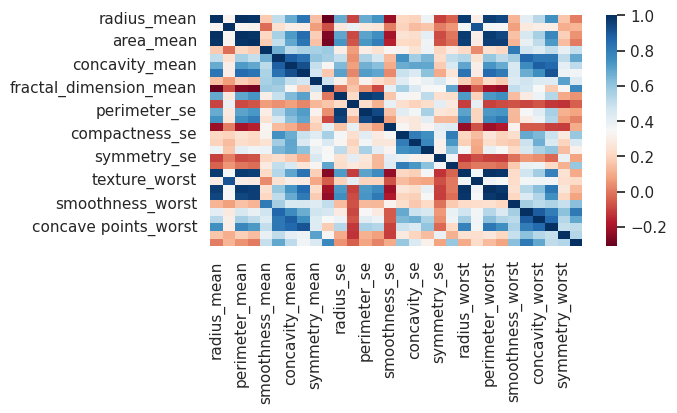

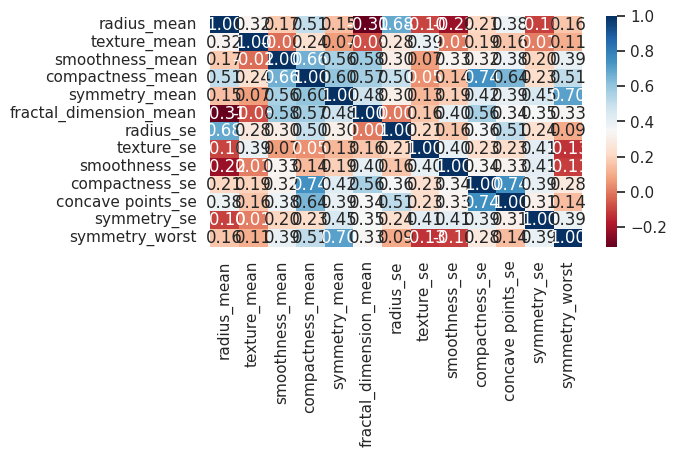

In [ ]:
drop_list, new_df = high_correlated_cols(df, drop_labels=["id", "diagnosis"], target=["diagnosis"], remove_correlated_variables=True)

In [ ]:
def basic_feature_selection_pipeline(dataset, drop_labels, target, corr_th=0.8):
  # Load Dataset
  X = dataset.drop(labels=drop_labels, axis=1)
  y = dataset[target]

  # Remove Constant Features Using Standard Deviation
  constant_features = [feature for feature in X.columns if X[feature].std() == 0]
  print("Constant Features: ", len(constant_features))
  non_constant_features = [feature for feature in X.columns if X[feature].std() != 0]
  X.drop(labels=constant_features, axis=1, inplace=True)

  # Remove Quasi Constant Features Using Standard Deviation
  quasi_constant_features = []
  non_quasi_constant_features = []
  for feature in X.columns:
    predominant = X[feature].value_counts(normalize=True).sort_values(ascending=False).values[0]
    if predominant > 0.998:
      quasi_constant_features.append(feature)
    else:
      non_quasi_constant_features.append(feature)
  print("Quasi-Constant Features: ", len(quasi_constant_features))
  X.drop(labels=quasi_constant_features, axis=1, inplace=True)

  # Remove Duplicated Features Using My Own Function
  duplicated_feature_pairs = {}
  duplicated_features = []
  for i in range(0, len(X.columns)):
    feature_1 = X.columns[i]
    if feature_1 not in duplicated_features:
      duplicated_feature_pairs[feature_1] = []
      for feature_2 in X.columns[i + 1:]:
        if X[feature_1].equals(X[feature_2]):
          duplicated_feature_pairs[feature_1].append(feature_2)
          duplicated_features.append(feature_2)

  print("Duplicated Features: ", len(duplicated_features))
  X = X[duplicated_feature_pairs.keys()]

  # Remove Highly Correlated Features
  num_cols = [col for col in X.columns if X[col].dtypes in ["uint8", "int64", "float64"]]
  corr = X[num_cols].corr()
  corr_matrix = corr.abs()
  upper_triangle_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
  drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
  X = X.drop(drop_list, axis=1)
  print("Correlated Features: ", len(drop_list))
  print("All Features For Train: ", X.shape[1])

  return X

In [ ]:
X = basic_feature_selection_pipeline(df, drop_labels=["id", "diagnosis"], target=["diagnosis"])

Constant Features:  0
Quasi-Constant Features:  0
Duplicated Features:  0
Correlated Features:  17
All Features For Train:  13


# Apply Mutual Information, ANOVA, and CHI2 Methods

In [ ]:
def filter_based_FS(dataset, drop_labels, target, score_funcs, k_features=10, test_size=0.33, plot=True):
    # Load Dataset
    X = dataset.drop(labels=drop_labels, axis=1)
    y = dataset[target]

    # Split Dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1)

    # Scale the features to be non-negative
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    plt.figure(figsize=(15, 5))
    top_features = {}

    for idx, score_func in enumerate(score_funcs, start=1):
        # Filter Based Methods
        model = SelectKBest(score_func=score_func, k=k_features)
        model.fit(X_train_scaled, y_train.values.ravel())

        # Extract feature scores
        scores = pd.Series(model.scores_, index=X_train.columns).sort_values(ascending=False)
        top_features[score_func.__name__] = scores.index.tolist()  # Store all features

        # Plot Results
        plt.subplot(1, len(score_funcs), idx)
        top_features_k = scores.head(k_features)
        plt.bar(top_features_k.index, top_features_k)
        plt.title(f"Top {k_features} Features for {score_func.__name__}")
        plt.xlabel("Feature Index")
        plt.ylabel("Score")
        plt.xticks(rotation='vertical')

    plt.tight_layout()
    plt.show()

    # Print top features for each method
    for method, features in top_features.items():
        print(f"Top {k_features} features for {method}:")
        for i, feature in enumerate(features[:k_features], start=1):
            print(f"{i}. {feature}")
        print("=" * 50)



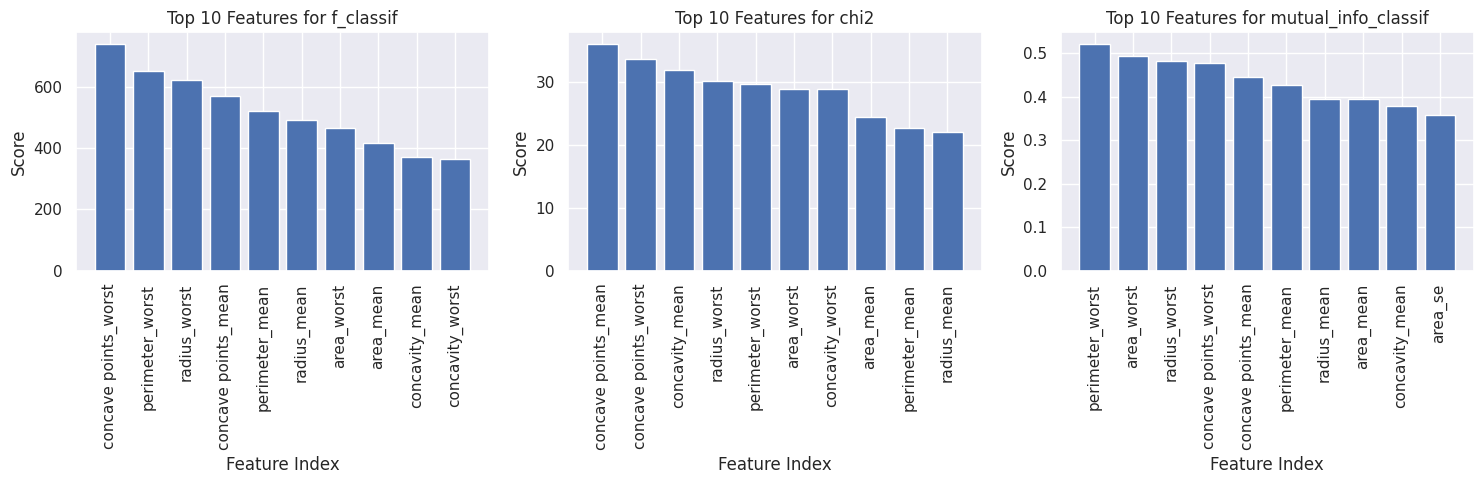

Top 10 features for f_classif:
1. concave points_worst
2. perimeter_worst
3. radius_worst
4. concave points_mean
5. perimeter_mean
6. radius_mean
7. area_worst
8. area_mean
9. concavity_mean
10. concavity_worst
Top 10 features for chi2:
1. concave points_mean
2. concave points_worst
3. concavity_mean
4. radius_worst
5. perimeter_worst
6. area_worst
7. concavity_worst
8. area_mean
9. perimeter_mean
10. radius_mean
Top 10 features for mutual_info_classif:
1. perimeter_worst
2. area_worst
3. radius_worst
4. concave points_worst
5. concave points_mean
6. perimeter_mean
7. radius_mean
8. area_mean
9. concavity_mean
10. area_se


In [ ]:
filter_based_FS(df, drop_labels=["id", "diagnosis"], target=["diagnosis"], score_funcs=[f_classif, chi2, mutual_info_classif])

# ALL Filter Methods

In [ ]:
def filter_and_feature_selection(dataset, drop_labels, target, score_funcs, k_features=15, corr_th=0.9):
  # Load Dataset
  X = dataset.drop(labels=drop_labels, axis=1)
  y = dataset[target]

  # Remove Constant Features Using Standard Deviation
  constant_features = [feature for feature in X.columns if X[feature].std() == 0]
  print("Constant Features: ", len(constant_features))
  non_constant_features = [feature for feature in X.columns if X[feature].std() != 0]
  X.drop(labels=constant_features, axis=1, inplace=True)

  # Remove Quasi Constant Features Using Standard Deviation
  quasi_constant_features = []
  non_quasi_constant_features = []
  for feature in X.columns:
    predominant = X[feature].value_counts(normalize=True).sort_values(ascending=False).values[0]
    if predominant > 0.998:
      quasi_constant_features.append(feature)
    else:
      non_quasi_constant_features.append(feature)
  print("Quasi-Constant Features: ", len(quasi_constant_features))
  X.drop(labels=quasi_constant_features, axis=1, inplace=True)

  # Remove Duplicated Features Using My Own Function
  duplicated_feature_pairs = {}
  duplicated_features = []
  for i in range(0, len(X.columns)):
    feature_1 = X.columns[i]
    if feature_1 not in duplicated_features:
      duplicated_feature_pairs[feature_1] = []
      for feature_2 in X.columns[i + 1:]:
        if X[feature_1].equals(X[feature_2]):
          duplicated_feature_pairs[feature_1].append(feature_2)
          duplicated_features.append(feature_2)

  print("Duplicated Features: ", len(duplicated_features))
  X = X[duplicated_feature_pairs.keys()]

  # Remove Highly Correlated Features
  num_cols = [col for col in X.columns if X[col].dtypes in ["uint8", "int64", "float64"]]
  corr = X[num_cols].corr()
  corr_matrix = corr.abs()
  upper_triangle_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
  drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
  X = X.drop(drop_list, axis=1)
  print("Correlated Features: ", len(drop_list))
  print(f"All Features Before Select {k_features} Feature: ", X.shape[1])

  # Scale the features to be non-negative
  scaler = MinMaxScaler()
  X_scaled = scaler.fit_transform(X)

  plt.figure(figsize=(15, 5))
  top_features = {}

  for idx, score_func in enumerate(score_funcs, start=1):
      # Filter Based Methods
      model = SelectKBest(score_func=score_func, k=k_features)
      model.fit(X_scaled, y.values.ravel())

      # Extract feature scores
      scores = pd.Series(model.scores_, index=X.columns).sort_values(ascending=False)
      top_features[score_func.__name__] = scores.index.tolist()  # Store all features

      # Plot Results
      plt.subplot(1, len(score_funcs), idx)
      top_features_k = scores.head(k_features)
      plt.bar(top_features_k.index, top_features_k)
      plt.title(f"Top {k_features} Features for {score_func.__name__}")
      plt.xlabel("Feature Index")
      plt.ylabel("Score")
      plt.xticks(rotation='vertical')

  plt.tight_layout()
  plt.show()

  # Print top features for each method
  for method, features in top_features.items():
      print(f"Top {k_features} features for {method}:")
      for i, feature in enumerate(features[:k_features], start=1):
          print(f"{i}. {feature}")
      print("=" * 50)

  return top_features, k_features

Constant Features:  0
Quasi-Constant Features:  0
Duplicated Features:  0
Correlated Features:  10
All Features Before Select 15 Feature:  20


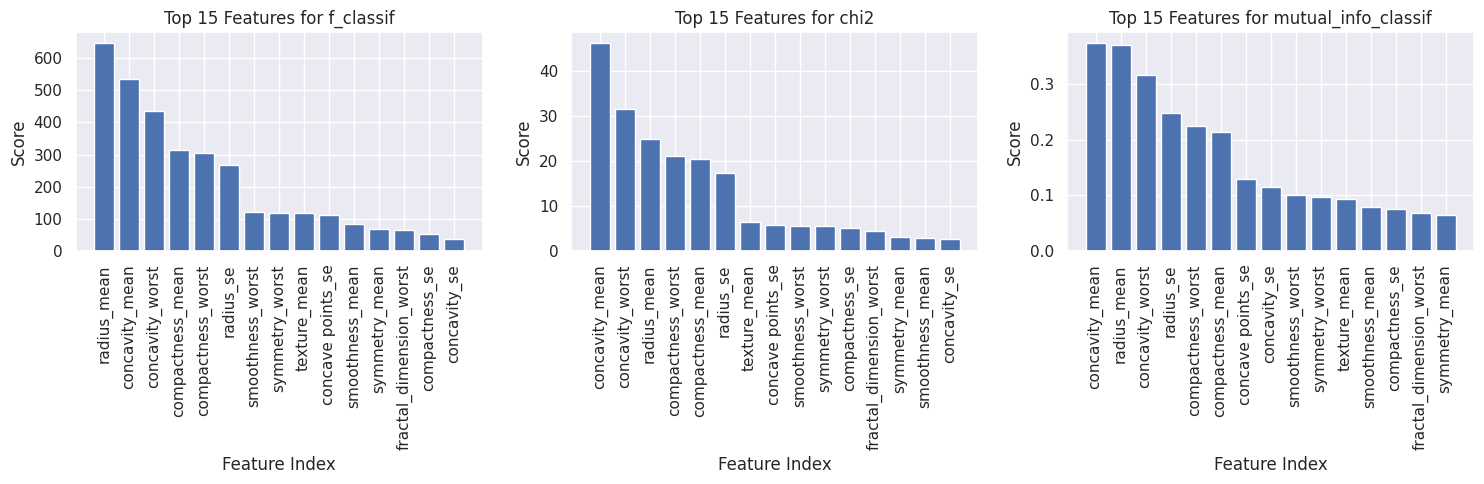

Top 15 features for f_classif:
1. radius_mean
2. concavity_mean
3. concavity_worst
4. compactness_mean
5. compactness_worst
6. radius_se
7. smoothness_worst
8. symmetry_worst
9. texture_mean
10. concave points_se
11. smoothness_mean
12. symmetry_mean
13. fractal_dimension_worst
14. compactness_se
15. concavity_se
Top 15 features for chi2:
1. concavity_mean
2. concavity_worst
3. radius_mean
4. compactness_worst
5. compactness_mean
6. radius_se
7. texture_mean
8. concave points_se
9. smoothness_worst
10. symmetry_worst
11. compactness_se
12. fractal_dimension_worst
13. symmetry_mean
14. smoothness_mean
15. concavity_se
Top 15 features for mutual_info_classif:
1. concavity_mean
2. radius_mean
3. concavity_worst
4. radius_se
5. compactness_worst
6. compactness_mean
7. concave points_se
8. concavity_se
9. smoothness_worst
10. symmetry_worst
11. texture_mean
12. smoothness_mean
13. compactness_se
14. fractal_dimension_worst
15. symmetry_mean


In [ ]:
top_features,  k_features = filter_and_feature_selection(df, drop_labels=["id", "diagnosis"], target=["diagnosis"], score_funcs=[f_classif, chi2, mutual_info_classif])

# Create Random Forest Model

In [ ]:
def RF_Model(X, y, test_size=0.3, cv=10, results=False, conf_matrix=False, c_report=False, roc=False):
    start_time = time.time()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1)
    rf_model = RandomForestClassifier().fit(X_train, y_train.values.ravel())
    y_train = y_train.values.ravel()
    y_test = y_test.values.ravel()
    if results:
        acc_train = accuracy_score(y_train, rf_model.predict(X_train))
        acc_test = accuracy_score(y_test, rf_model.predict(X_test))
        r2 = rf_model.score(X, y)
        r2_train = rf_model.score(X_train, y_train)
        r2_test = rf_model.score(X_test, y_test)
        cv_train = cross_val_score(rf_model, X_train, y_train, cv=cv).mean()
        cv_test = cross_val_score(rf_model, X_test, y_test, cv=cv).mean()
        print("##################### Accuracy & R2 Metrics ######################")
        print("Accuracy_train: ", "%.3f" % acc_train)
        print("Accuracy_test: ", "%.3f" % acc_test)
        print("R2: ", "%.3f" % r2)
        print("R2_train: ", "%.3f" % r2_train)
        print("R2_test: ", "%.3f" % r2_test)
        print("Cross Validation Score(Train): ", "%.3f" % cv_train)
        print("Cross Validation Score(Test): ", "%.3f" % cv_test)

    if conf_matrix:
        print("##################### Confusion Matrix(Train) ######################")
        cm_train = confusion_matrix(y_train, rf_model.predict(X_train))
        print(cm_train)
        print("##################### Confusion Matrix(Test) ######################")
        cm_test = confusion_matrix(y_test, rf_model.predict(X_test))
        print(cm_test)

        # Plot confusion matrix
        fig, axs = plt.subplots(1, 2, figsize=(12, 6))
        sns.heatmap(cm_train, annot=True, cmap='Blues', fmt='g', ax=axs[0])
        axs[0].set_title("Confusion Matrix (Train)")
        sns.heatmap(cm_test, annot=True, cmap='Blues', fmt='g', ax=axs[1])
        axs[1].set_title("Confusion Matrix (Test)")
        plt.show()

    if c_report:
        print("###################### Classification Report(Train) ######################")
        print(classification_report(y_train, rf_model.predict(X_train)))
        print("###################### Classification Report(Test) ######################")
        print(classification_report(y_test, rf_model.predict(X_test)))

    if roc:
        print("###################### Roc Auc Score(Train) ######################")
        rf_roc_auc_train = roc_auc_score(y_train, rf_model.predict(X_train))
        print("Roc Auc Train: ", "%.3f" % rf_roc_auc_train)
        fpr_train, tpr_train, thresholds_train = roc_curve(y_train, rf_model.predict_proba(X_train)[:,1])

        print("###################### Roc Auc Score(Test) ######################")
        rf_roc_auc_test = roc_auc_score(y_test, rf_model.predict(X_test))
        print("Roc Auc Test: ", "%.3f" % rf_roc_auc_test)
        fpr_test, tpr_test, thresholds_test = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])

        # Plot ROC curves
        fig, axs = plt.subplots(1, 2, figsize=(12, 6))
        axs[0].plot(fpr_train, tpr_train, label='AUC (area = %.3f)' % rf_roc_auc_train)
        axs[0].plot([0, 1], [0, 1], 'r--')
        axs[0].set_xlim([0.0, 1.0])
        axs[0].set_ylim([0.0, 1.05])
        axs[0].set_xlabel('False Positive Ratio')
        axs[0].set_ylabel('True Positive Ratio')
        axs[0].set_title('ROC (Train)')

        axs[1].plot(fpr_test, tpr_test, label='AUC (area = %.3f)' % rf_roc_auc_test)
        axs[1].plot([0, 1], [0, 1], 'r--')
        axs[1].set_xlim([0.0, 1.0])
        axs[1].set_ylim([0.0, 1.05])
        axs[1].set_xlabel('False Positive Ratio')
        axs[1].set_ylabel('True Positive Ratio')
        axs[1].set_title('ROC (Test)')

        plt.legend(loc="lower right")
        plt.show()

    end_time = time.time()
    elapsed_time = end_time - start_time
    minutes = int(elapsed_time // 60)
    seconds = int(elapsed_time % 60)
    print(f"Function execution time: {minutes} minutes {seconds} seconds")

    return rf_model

# Create Random Forest Model With Feature Selection

In [ ]:
def RF_Model_With_FS(dataframe, drop_labels, target):
    # Load Dataset
    X = dataframe.drop(labels=drop_labels, axis=1)
    y = dataframe[target]

    # Call random forest for prediction without feature selection
    print(50*"#", "Results for Random Forest Without Feature Selection", 50*"#")
    rf_model = RF_Model(X, y, results=True, conf_matrix=True, c_report=True, roc=True)

    # Call filter_and_feature_selection method to get feature selections
    top_features, k_features = filter_and_feature_selection(dataframe, drop_labels=drop_labels, target=target, score_funcs=[f_classif, chi2, mutual_info_classif])

    # Call RF_Model method for each feature selection
    rf_models = {}
    for method, features in top_features.items():
        print(50*"#", f"Results for {method}", 50*"#")
        X_selected = top_features[method][0:k_features]
        X_selected = X.loc[:, X_selected]
        rf_model = RF_Model(X_selected, y, results=True, conf_matrix=True, c_report=True, roc=True)
        rf_models[method] = rf_model

    return rf_models

################################################## Results for Random Forest Without Feature Selection ##################################################
##################### Accuracy & R2 Metrics ######################
Accuracy_train:  1.000
Accuracy_test:  0.953
R2:  0.986
R2_train:  1.000
R2_test:  0.953
Cross Validation Score(Train):  0.952
Cross Validation Score(Test):  0.936
##################### Confusion Matrix(Train) ######################
[[249   0]
 [  0 149]]
##################### Confusion Matrix(Test) ######################
[[106   2]
 [  6  57]]


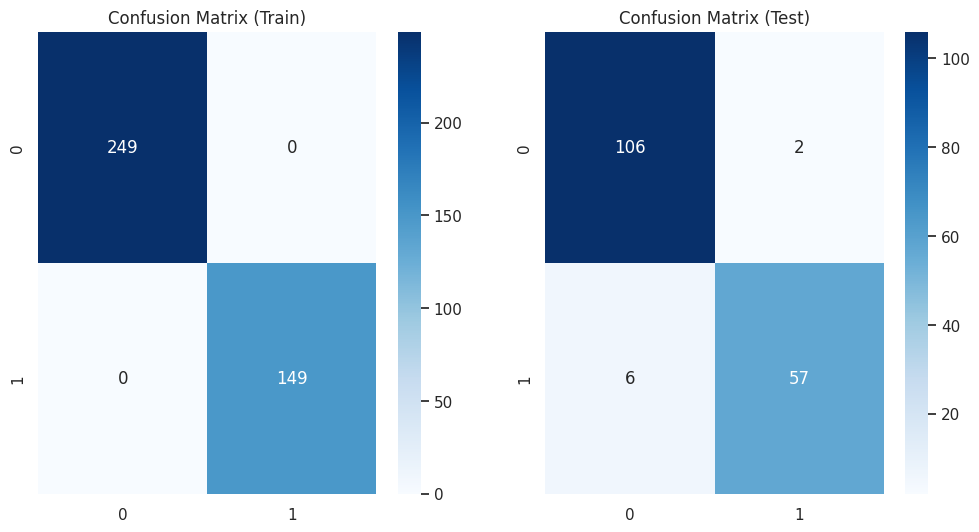

###################### Classification Report(Train) ######################
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       249
           1       1.00      1.00      1.00       149

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398

###################### Classification Report(Test) ######################
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       108
           1       0.97      0.90      0.93        63

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171

###################### Roc Auc Score(Train) ######################
Roc Auc Train:  1.000
###################### Roc Auc Score(Test) ######################
Roc Auc Test:  0.943


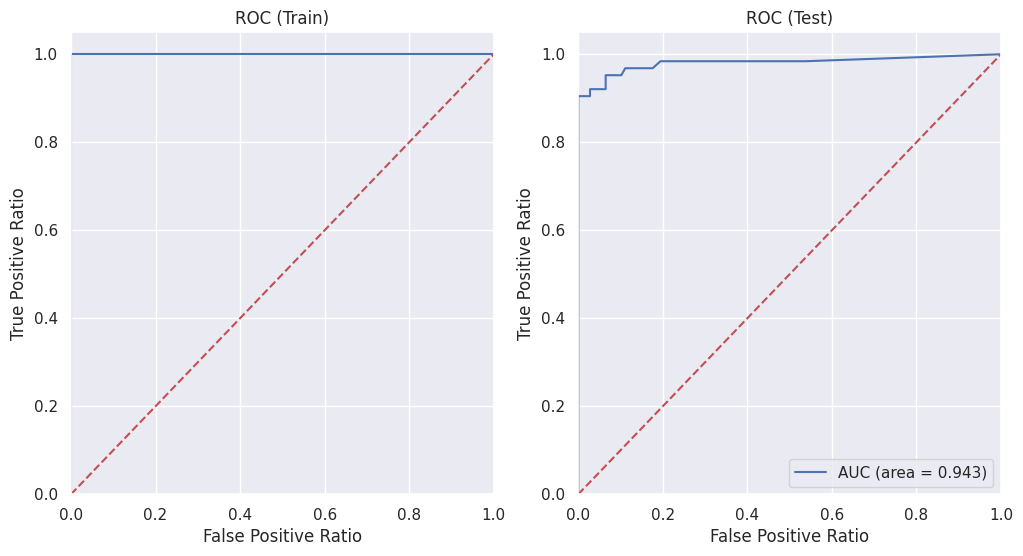

Function execution time: 0 minutes 6 seconds
Constant Features:  0
Quasi-Constant Features:  0
Duplicated Features:  0
Correlated Features:  10
All Features Before Select 15 Feature:  20


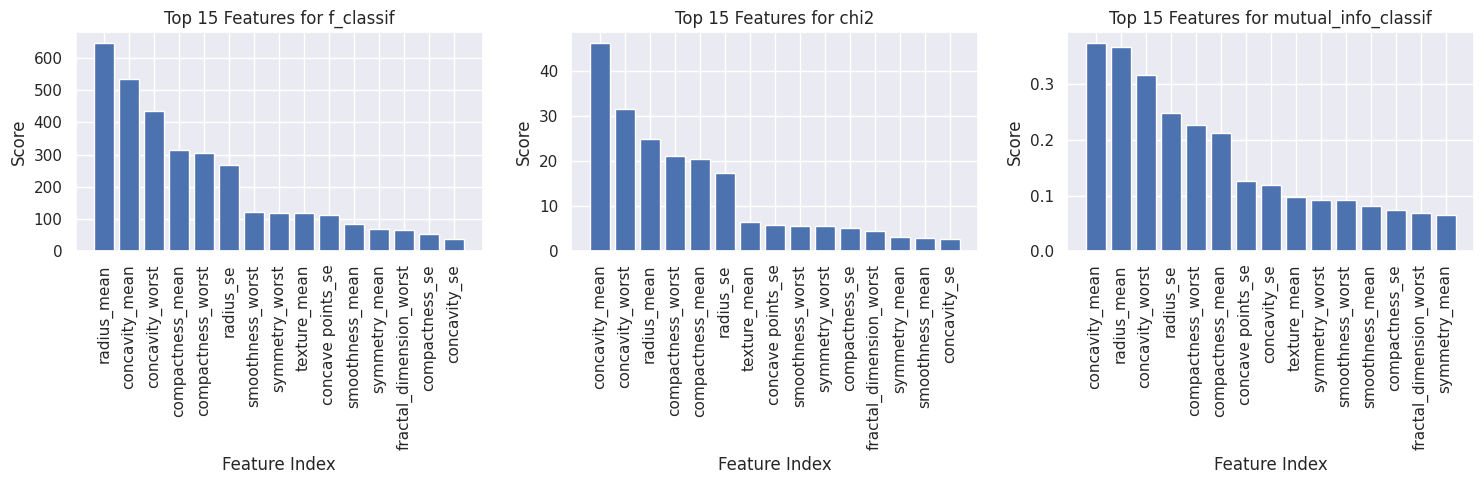

Top 15 features for f_classif:
1. radius_mean
2. concavity_mean
3. concavity_worst
4. compactness_mean
5. compactness_worst
6. radius_se
7. smoothness_worst
8. symmetry_worst
9. texture_mean
10. concave points_se
11. smoothness_mean
12. symmetry_mean
13. fractal_dimension_worst
14. compactness_se
15. concavity_se
Top 15 features for chi2:
1. concavity_mean
2. concavity_worst
3. radius_mean
4. compactness_worst
5. compactness_mean
6. radius_se
7. texture_mean
8. concave points_se
9. smoothness_worst
10. symmetry_worst
11. compactness_se
12. fractal_dimension_worst
13. symmetry_mean
14. smoothness_mean
15. concavity_se
Top 15 features for mutual_info_classif:
1. concavity_mean
2. radius_mean
3. concavity_worst
4. radius_se
5. compactness_worst
6. compactness_mean
7. concave points_se
8. concavity_se
9. texture_mean
10. symmetry_worst
11. smoothness_worst
12. smoothness_mean
13. compactness_se
14. fractal_dimension_worst
15. symmetry_mean
##################################################

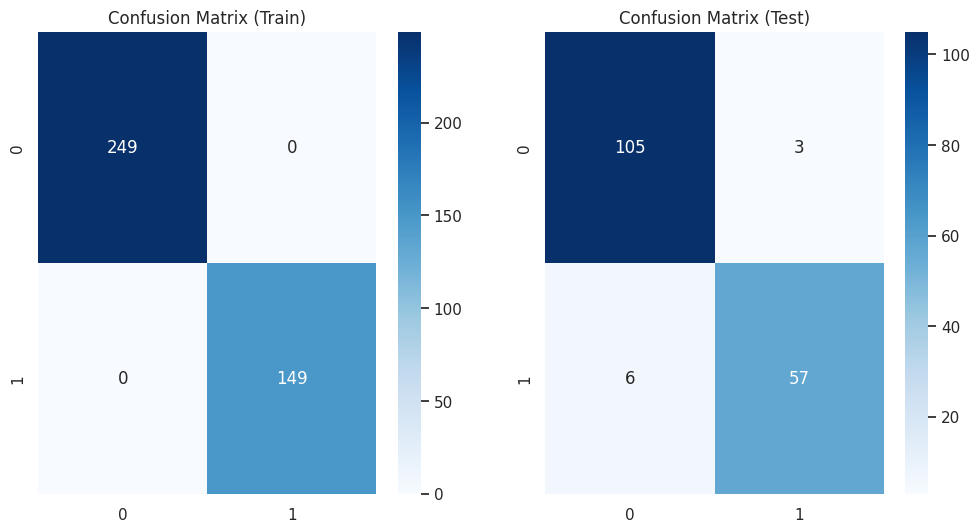

###################### Classification Report(Train) ######################
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       249
           1       1.00      1.00      1.00       149

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398

###################### Classification Report(Test) ######################
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       108
           1       0.95      0.90      0.93        63

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171

###################### Roc Auc Score(Train) ######################
Roc Auc Train:  1.000
###################### Roc Auc Score(Test) ######################
Roc Auc Test:  0.938


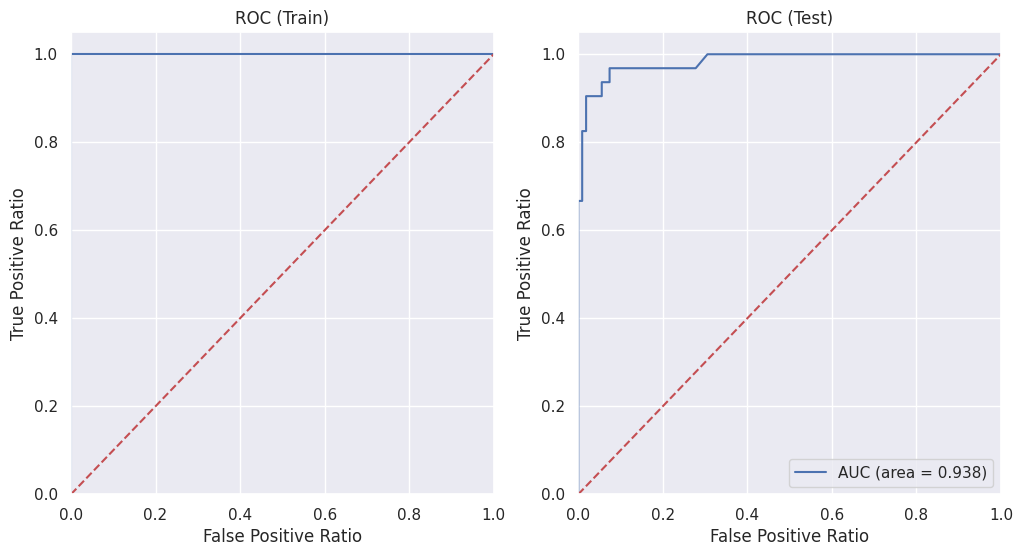

Function execution time: 0 minutes 5 seconds
################################################## Results for chi2 ##################################################
##################### Accuracy & R2 Metrics ######################
Accuracy_train:  1.000
Accuracy_test:  0.953
R2:  0.986
R2_train:  1.000
R2_test:  0.953
Cross Validation Score(Train):  0.945
Cross Validation Score(Test):  0.912
##################### Confusion Matrix(Train) ######################
[[249   0]
 [  0 149]]
##################### Confusion Matrix(Test) ######################
[[105   3]
 [  5  58]]


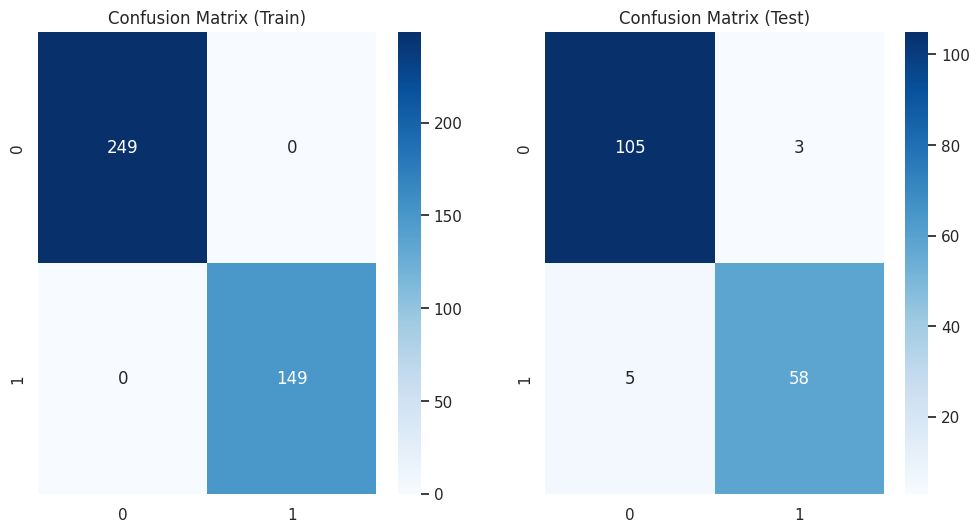

###################### Classification Report(Train) ######################
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       249
           1       1.00      1.00      1.00       149

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398

###################### Classification Report(Test) ######################
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       108
           1       0.95      0.92      0.94        63

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171

###################### Roc Auc Score(Train) ######################
Roc Auc Train:  1.000
###################### Roc Auc Score(Test) ######################
Roc Auc Test:  0.946


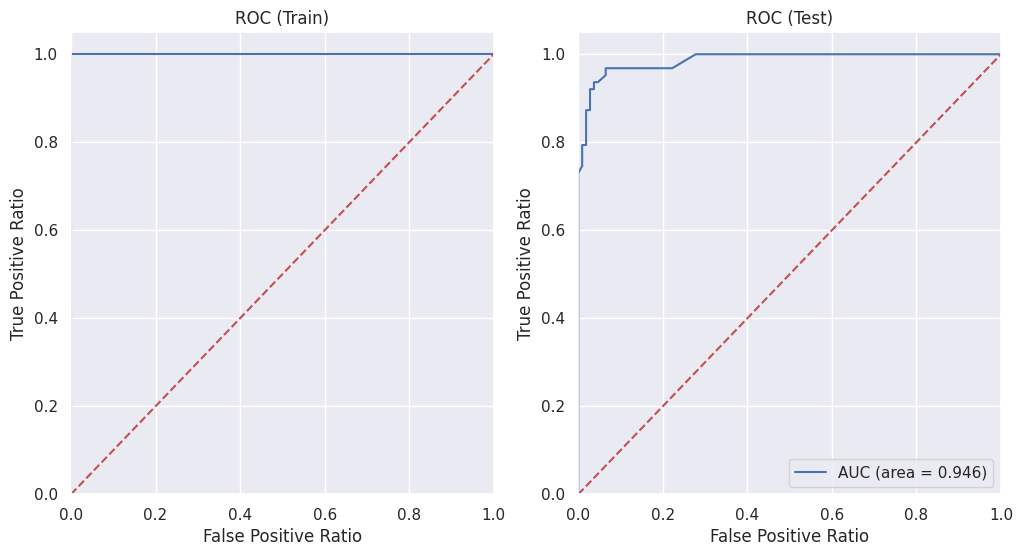

Function execution time: 0 minutes 5 seconds
################################################## Results for mutual_info_classif ##################################################
##################### Accuracy & R2 Metrics ######################
Accuracy_train:  1.000
Accuracy_test:  0.930
R2:  0.979
R2_train:  1.000
R2_test:  0.930
Cross Validation Score(Train):  0.950
Cross Validation Score(Test):  0.907
##################### Confusion Matrix(Train) ######################
[[249   0]
 [  0 149]]
##################### Confusion Matrix(Test) ######################
[[105   3]
 [  9  54]]


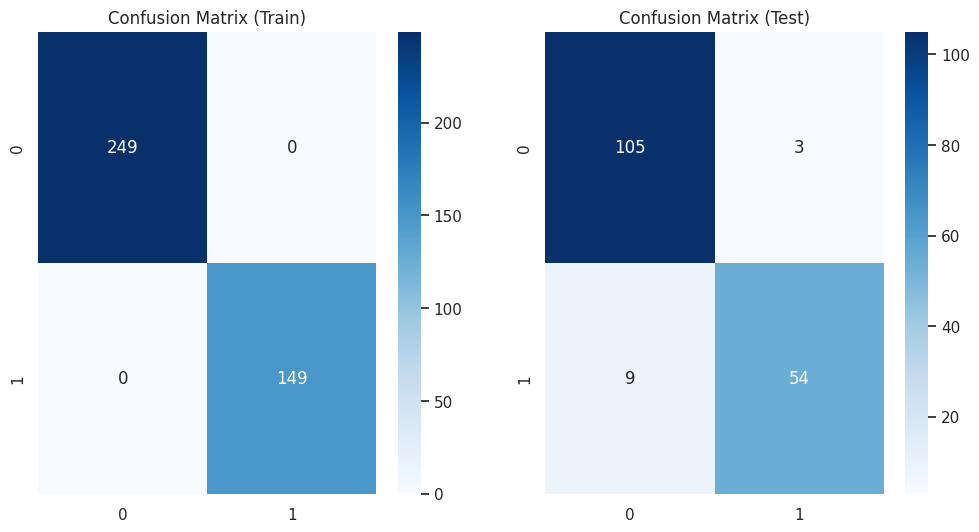

###################### Classification Report(Train) ######################
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       249
           1       1.00      1.00      1.00       149

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398

###################### Classification Report(Test) ######################
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       108
           1       0.95      0.86      0.90        63

    accuracy                           0.93       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.93      0.93       171

###################### Roc Auc Score(Train) ######################
Roc Auc Train:  1.000
###################### Roc Auc Score(Test) ######################
Roc Auc Test:  0.915


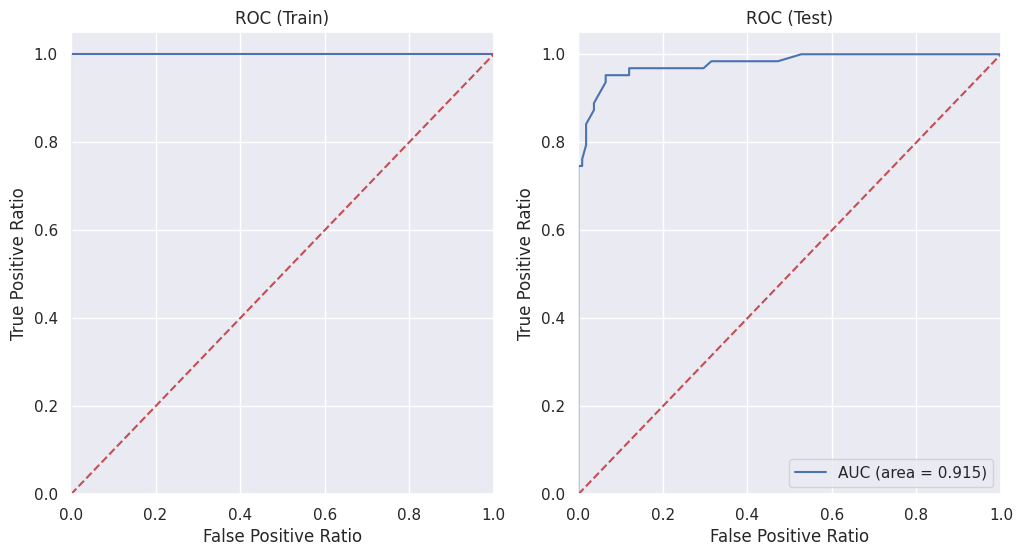

Function execution time: 0 minutes 6 seconds


In [ ]:
rf_model = RF_Model_With_FS(df, drop_labels=["id", "diagnosis"], target=["diagnosis"])

# Wrapper Methods
Wrapper methods are a class of feature selection techniques in machine learning where subsets of features are evaluated using a predictive model to identify the best-performing subset. These methods explore different combinations of features using a specific algorithm (wrapper), assessing each combination's performance based on a chosen criterion. The process continues until the algorithm identifies the optimal subset maximizing model performance. Although computationally expensive compared to filter methods, wrapper methods often yield superior results by considering feature interactions and overall model performance. These methodologies can be broadly categorized into five main types:

1. Sequnetial Forward Feature Selection
2. Sequnetial Forward Floating Feature Selection
3. Sequnetial Backward Feature Selection
4. Sequnetial Backward Floating Feature Selection
5. Exhaustive Feature Selection

In [ ]:
!pip install mlxtend
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, mean_squared_error
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import normalize
from mlxtend.feature_selection import SequentialFeatureSelector
from mlxtend.feature_selection import ExhaustiveFeatureSelector

# Sequential Feature Selection
Sequential feature selection is a technique used to determine the most suitable feature subset for a machine learning model. In this method, subsets of features are sequentially evaluated, and at each step, the features that provide the best performance are selected. Model performance is continuously assessed by adding or removing features, ultimately determining the optimal feature subset.

In [ ]:
def SequentialFeatureSelectionWarpper(X, y, k_features=10, test_size=0.30, scoring="roc_auc", forward=True):
    # Fill missing data
    df_without_nan = X.apply(lambda x: x.fillna(x.value_counts().index[0]))

    # Encoding
    feature_names = df_without_nan.columns.tolist()
    data_encoder = OrdinalEncoder()
    input_encoded = data_encoder.fit_transform(df_without_nan)
    input_normalized = normalize(input_encoded, axis=0)
    X = pd.DataFrame(input_normalized, columns=feature_names)

    # Split Dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1)
    selected_features_all = []
    # Feature selection
    model_wrapper = SequentialFeatureSelector(RandomForestClassifier(), k_features, scoring=scoring, forward=forward)
    mymodel = model_wrapper.fit(X_train, y_train.values.ravel())
    selected_features_idx = list(mymodel.k_feature_idx_)
    selected_features_names = [feature_names[idx] for idx in selected_features_idx]
    selected_features_all.append(selected_features_names)

    return selected_features_all

In [ ]:
def RF_Model_With_SFS(top_features, k_features, dataframe, drop_labels, target, forward=True):
    # Load Dataset
    X = dataframe.drop(labels=drop_labels, axis=1)
    y = dataframe[target]

    selected_features = []
    for method, features in top_features.items():
        print(50*"#", f"Results for {method}", 50*"#")
        X_selected = top_features[method][0:k_features]
        X_selected = X.loc[:, X_selected]
        X_selected = SequentialFeatureSelectionWarpper(X_selected, y, forward=forward)
        selected_features.append(X_selected)
        print(selected_features)

    selected_features = [i[0] for i in selected_features]
    for i in selected_features:
        X_selected = X.loc[:, i]
        rf_model = RF_Model(X_selected, y, results=True, conf_matrix=True, c_report=True, roc=True)

    return rf_model


## Sequential Forward Feature Selection

################################################## Results for f_classif ##################################################
[[['radius_mean', 'concavity_mean', 'concavity_worst', 'radius_se', 'smoothness_worst', 'texture_mean', 'concave points_se', 'smoothness_mean', 'compactness_se', 'concavity_se']]]
################################################## Results for chi2 ##################################################
[[['radius_mean', 'concavity_mean', 'concavity_worst', 'radius_se', 'smoothness_worst', 'texture_mean', 'concave points_se', 'smoothness_mean', 'compactness_se', 'concavity_se']], [['concavity_mean', 'concavity_worst', 'radius_mean', 'radius_se', 'texture_mean', 'smoothness_worst', 'compactness_se', 'fractal_dimension_worst', 'symmetry_mean', 'concavity_se']]]
################################################## Results for mutual_info_classif ##################################################
[[['radius_mean', 'concavity_mean', 'concavity_worst', 'radius_se', 'smoothness_

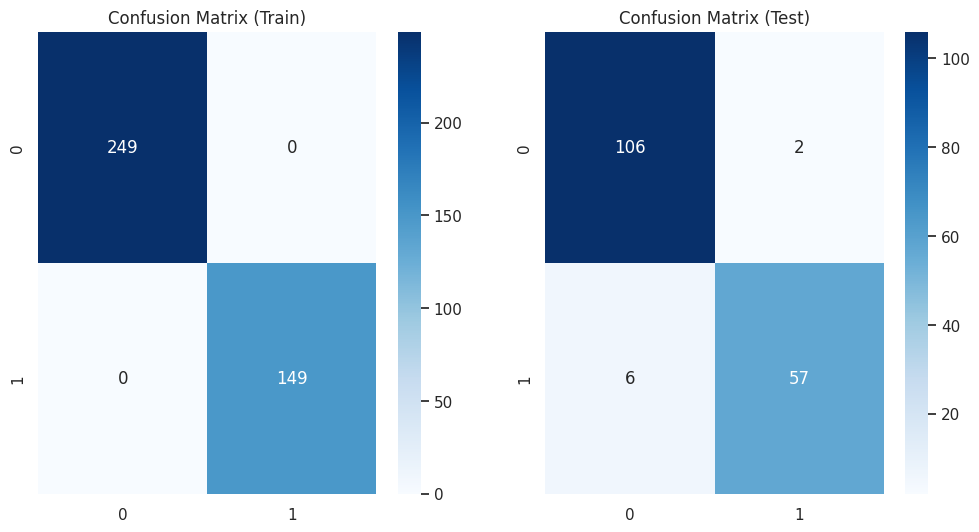

###################### Classification Report(Train) ######################
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       249
           1       1.00      1.00      1.00       149

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398

###################### Classification Report(Test) ######################
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       108
           1       0.97      0.90      0.93        63

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171

###################### Roc Auc Score(Train) ######################
Roc Auc Train:  1.000
###################### Roc Auc Score(Test) ######################
Roc Auc Test:  0.943


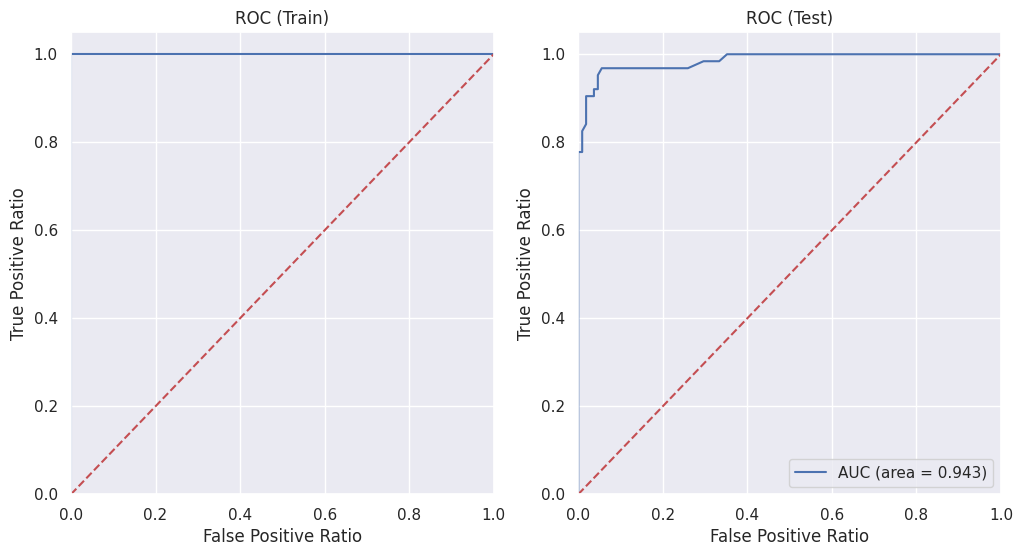

Function execution time: 0 minutes 5 seconds
##################### Accuracy & R2 Metrics ######################
Accuracy_train:  1.000
Accuracy_test:  0.953
R2:  0.986
R2_train:  1.000
R2_test:  0.953
Cross Validation Score(Train):  0.945
Cross Validation Score(Test):  0.918
##################### Confusion Matrix(Train) ######################
[[249   0]
 [  0 149]]
##################### Confusion Matrix(Test) ######################
[[106   2]
 [  6  57]]


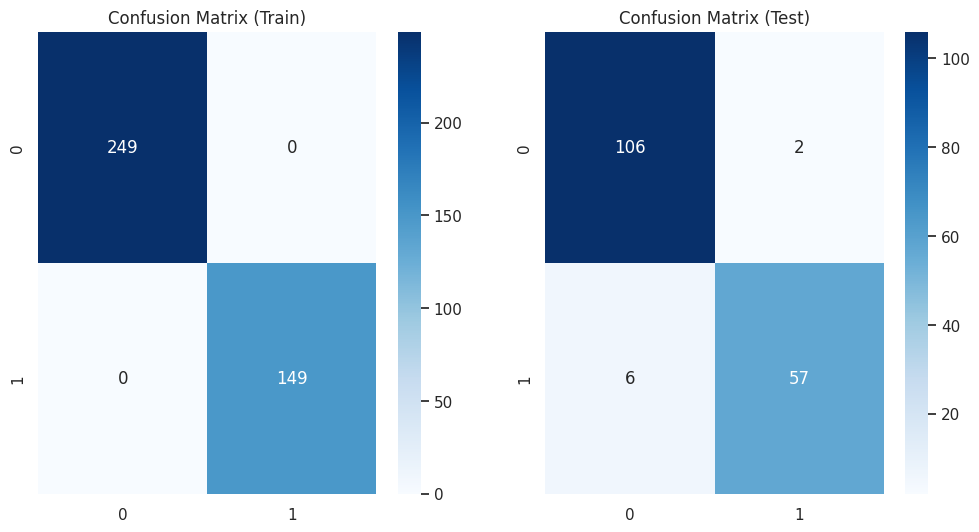

###################### Classification Report(Train) ######################
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       249
           1       1.00      1.00      1.00       149

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398

###################### Classification Report(Test) ######################
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       108
           1       0.97      0.90      0.93        63

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171

###################### Roc Auc Score(Train) ######################
Roc Auc Train:  1.000
###################### Roc Auc Score(Test) ######################
Roc Auc Test:  0.943


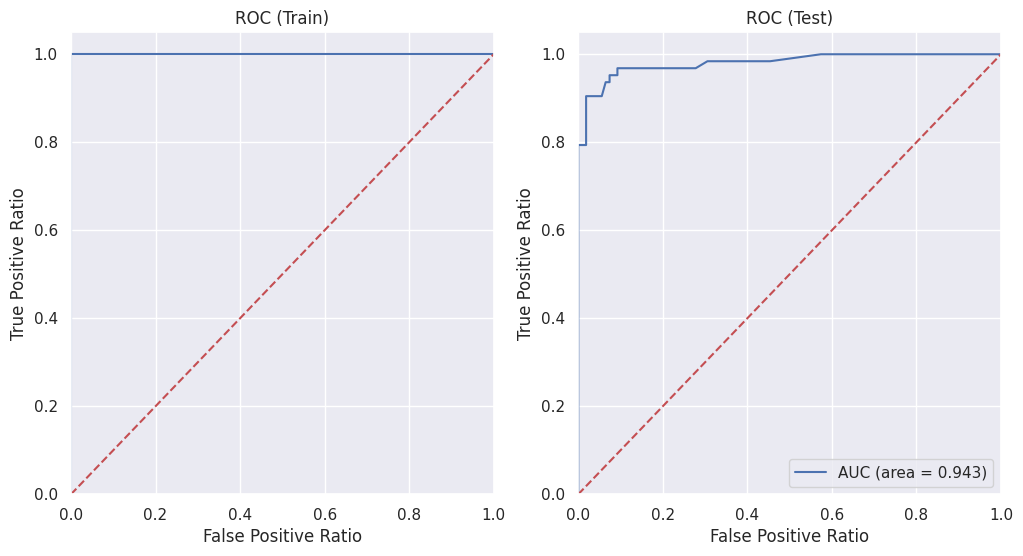

Function execution time: 0 minutes 5 seconds
##################### Accuracy & R2 Metrics ######################
Accuracy_train:  1.000
Accuracy_test:  0.947
R2:  0.984
R2_train:  1.000
R2_test:  0.947
Cross Validation Score(Train):  0.945
Cross Validation Score(Test):  0.918
##################### Confusion Matrix(Train) ######################
[[249   0]
 [  0 149]]
##################### Confusion Matrix(Test) ######################
[[104   4]
 [  5  58]]


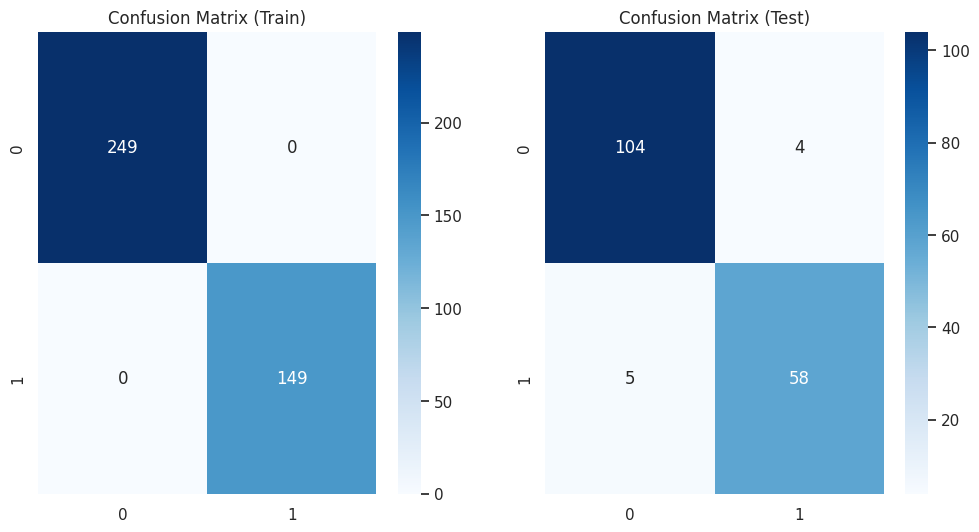

###################### Classification Report(Train) ######################
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       249
           1       1.00      1.00      1.00       149

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398

###################### Classification Report(Test) ######################
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       108
           1       0.94      0.92      0.93        63

    accuracy                           0.95       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171

###################### Roc Auc Score(Train) ######################
Roc Auc Train:  1.000
###################### Roc Auc Score(Test) ######################
Roc Auc Test:  0.942


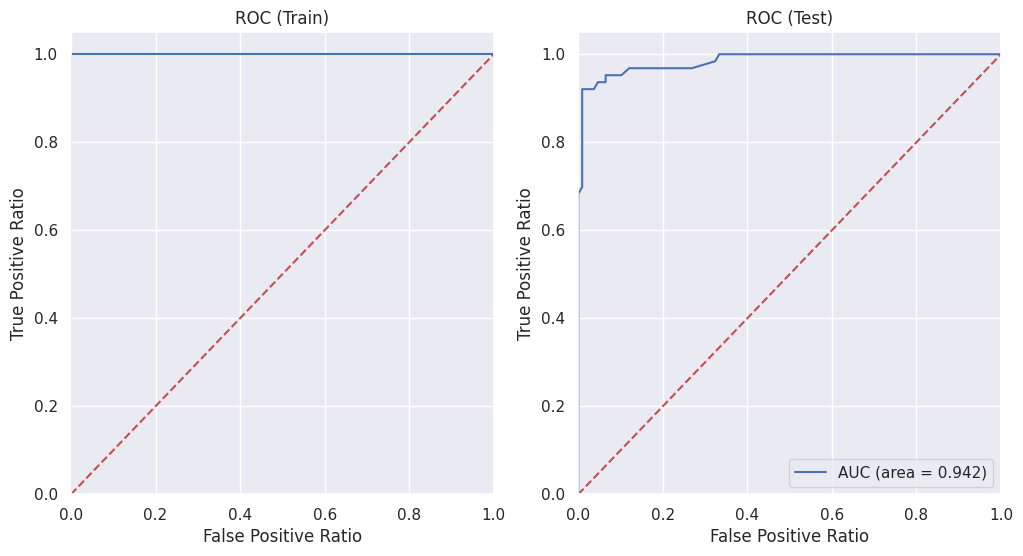

Function execution time: 0 minutes 6 seconds


RandomForestClassifier()

In [ ]:
RF_Model_With_SFS(top_features, k_features, df, drop_labels=["id", "diagnosis"], target=["diagnosis"])

## Sequential Backward Feature Selection

################################################## Results for f_classif ##################################################
[[['radius_mean', 'concavity_worst', 'compactness_worst', 'radius_se', 'smoothness_worst', 'texture_mean', 'concave points_se', 'smoothness_mean', 'symmetry_mean', 'compactness_se']]]
################################################## Results for chi2 ##################################################
[[['radius_mean', 'concavity_worst', 'compactness_worst', 'radius_se', 'smoothness_worst', 'texture_mean', 'concave points_se', 'smoothness_mean', 'symmetry_mean', 'compactness_se']], [['concavity_worst', 'radius_mean', 'radius_se', 'texture_mean', 'concave points_se', 'smoothness_worst', 'symmetry_worst', 'fractal_dimension_worst', 'symmetry_mean', 'smoothness_mean']]]
################################################## Results for mutual_info_classif ##################################################
[[['radius_mean', 'concavity_worst', 'compactness_worst', 'radius_

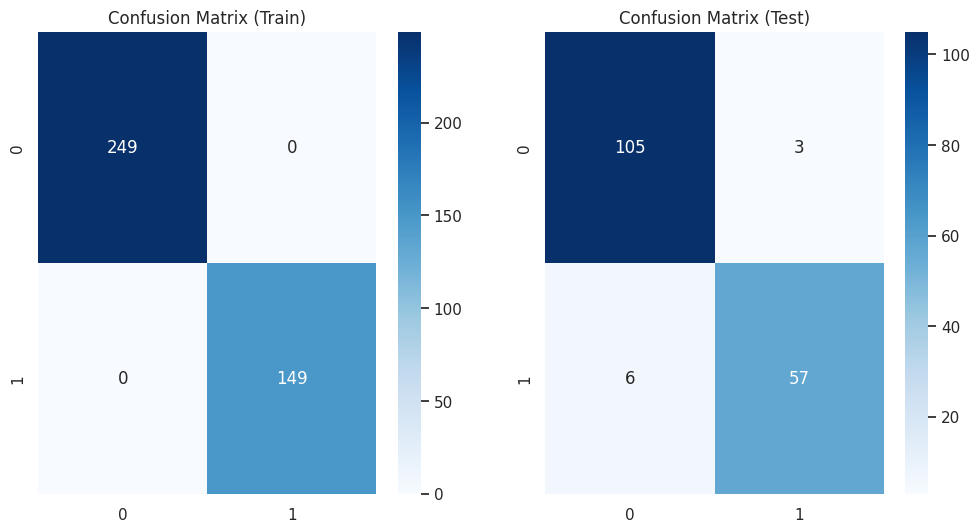

###################### Classification Report(Train) ######################
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       249
           1       1.00      1.00      1.00       149

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398

###################### Classification Report(Test) ######################
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       108
           1       0.95      0.90      0.93        63

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171

###################### Roc Auc Score(Train) ######################
Roc Auc Train:  1.000
###################### Roc Auc Score(Test) ######################
Roc Auc Test:  0.938


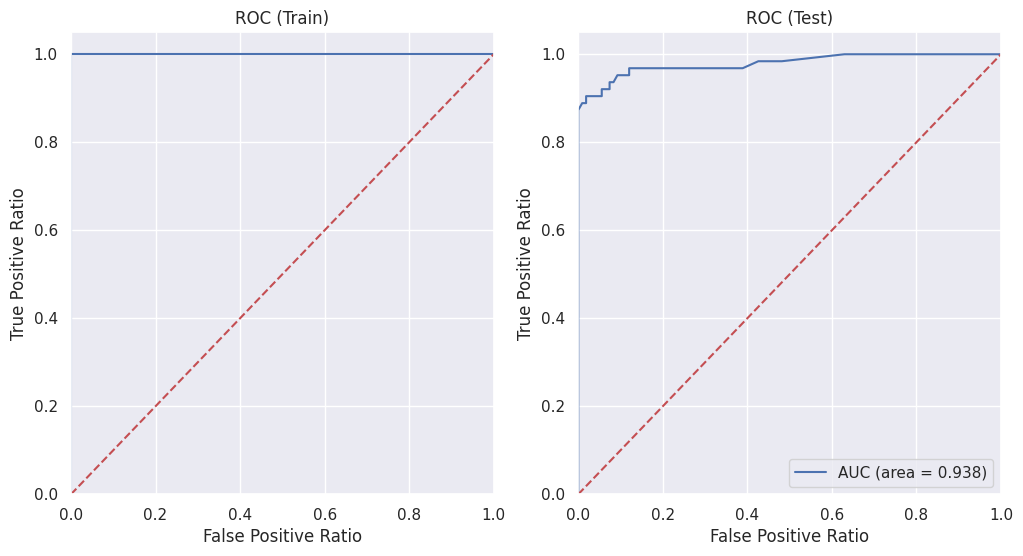

Function execution time: 0 minutes 5 seconds
##################### Accuracy & R2 Metrics ######################
Accuracy_train:  1.000
Accuracy_test:  0.942
R2:  0.982
R2_train:  1.000
R2_test:  0.942
Cross Validation Score(Train):  0.962
Cross Validation Score(Test):  0.918
##################### Confusion Matrix(Train) ######################
[[249   0]
 [  0 149]]
##################### Confusion Matrix(Test) ######################
[[104   4]
 [  6  57]]


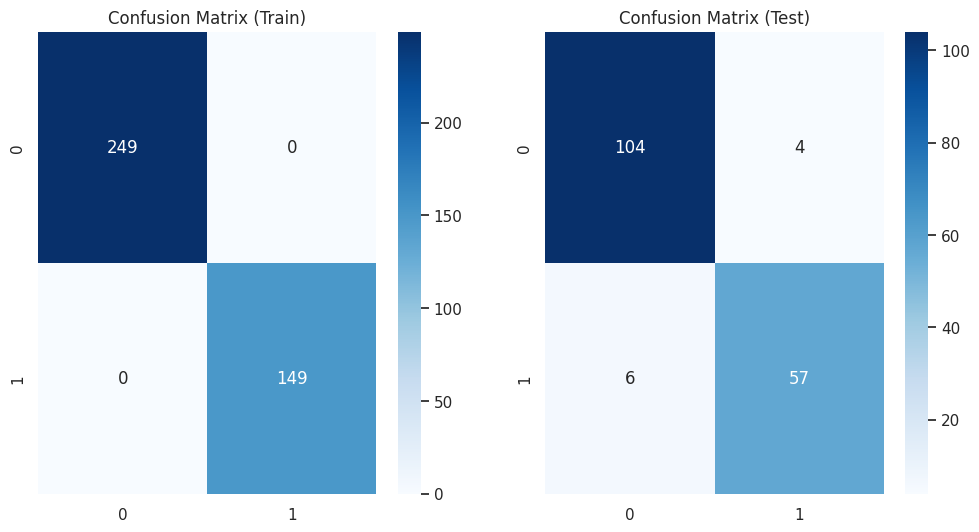

###################### Classification Report(Train) ######################
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       249
           1       1.00      1.00      1.00       149

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398

###################### Classification Report(Test) ######################
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       108
           1       0.93      0.90      0.92        63

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171

###################### Roc Auc Score(Train) ######################
Roc Auc Train:  1.000
###################### Roc Auc Score(Test) ######################
Roc Auc Test:  0.934


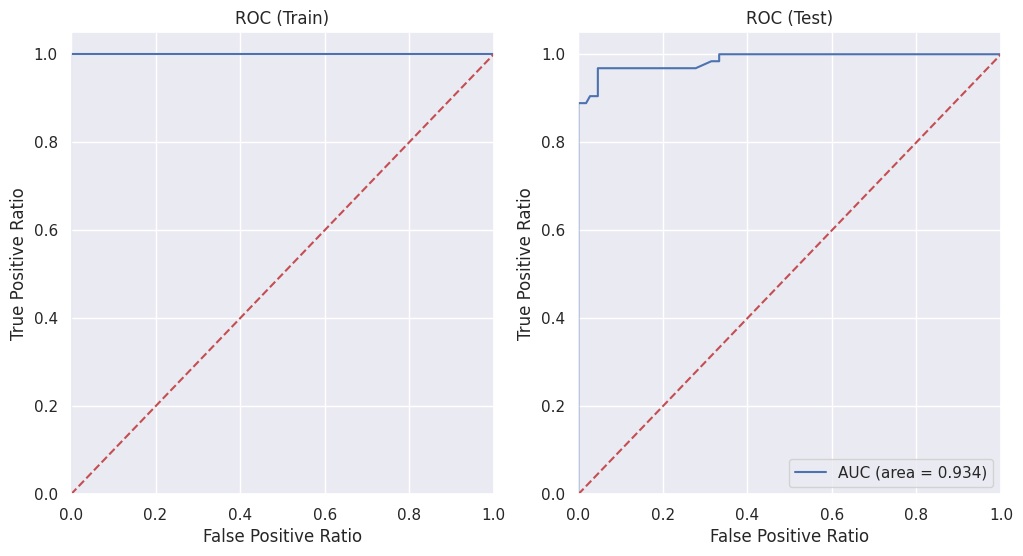

Function execution time: 0 minutes 6 seconds
##################### Accuracy & R2 Metrics ######################
Accuracy_train:  1.000
Accuracy_test:  0.942
R2:  0.982
R2_train:  1.000
R2_test:  0.942
Cross Validation Score(Train):  0.972
Cross Validation Score(Test):  0.918
##################### Confusion Matrix(Train) ######################
[[249   0]
 [  0 149]]
##################### Confusion Matrix(Test) ######################
[[104   4]
 [  6  57]]


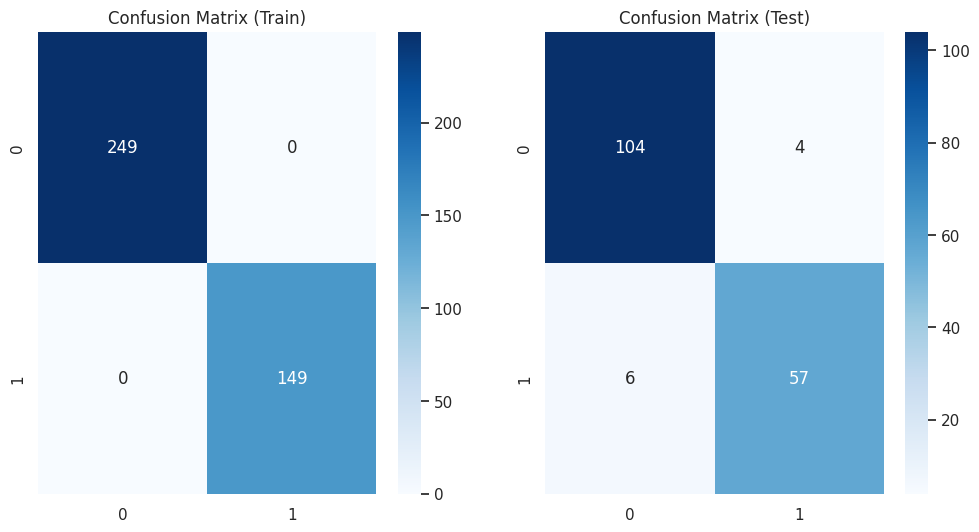

###################### Classification Report(Train) ######################
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       249
           1       1.00      1.00      1.00       149

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398

###################### Classification Report(Test) ######################
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       108
           1       0.93      0.90      0.92        63

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171

###################### Roc Auc Score(Train) ######################
Roc Auc Train:  1.000
###################### Roc Auc Score(Test) ######################
Roc Auc Test:  0.934


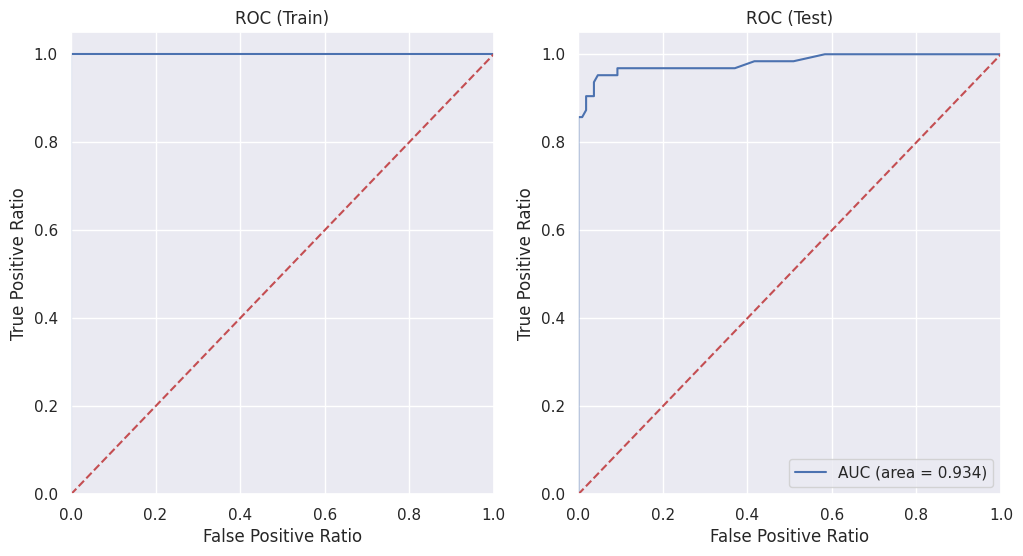

Function execution time: 0 minutes 5 seconds


RandomForestClassifier()

In [ ]:
RF_Model_With_SFS(top_features, k_features, df, drop_labels=["id", "diagnosis"], target="diagnosis", forward=False)

# Sequential Floating Feature Selection

Sequential floating feature selection (SFFS) is a feature selection technique that iteratively builds feature subsets by adding or removing features based on their impact on model performance. Unlike sequential forward or backward selection, SFFS allows for both addition and removal of features during each iteration, aiming to find the most relevant subset of features for the model. This method iteratively evaluates different combinations of features to determine the optimal subset that maximizes model performance.

In [ ]:
def SequentialFloatingFeatureSelectionWarpper(X, y, k_features=10, test_size=0.30, scoring="roc_auc", forward=True, floating=True):
    # Fill missing data
    df_without_nan = X.apply(lambda x: x.fillna(x.value_counts().index[0]))

    # Encoding
    feature_names = df_without_nan.columns.tolist()
    data_encoder = OrdinalEncoder()
    input_encoded = data_encoder.fit_transform(df_without_nan)
    input_normalized = normalize(input_encoded, axis=0)
    X = pd.DataFrame(input_normalized, columns=feature_names)

    # Split Dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1)
    selected_features_all = []
    # Feature selection
    model_wrapper = SequentialFeatureSelector(RandomForestClassifier(), k_features, scoring=scoring, forward=forward, floating=floating)
    mymodel = model_wrapper.fit(X_train, y_train.values.ravel())
    selected_features_idx = list(mymodel.k_feature_idx_)
    selected_features_names = [feature_names[idx] for idx in selected_features_idx]
    selected_features_all.append(selected_features_names)

    return selected_features_all

In [ ]:
def RF_Model_With_SFFS(top_features, k_features, dataframe, drop_labels, target, forward=True, floating=True):
    # Load Dataset
    X = dataframe.drop(labels=drop_labels, axis=1)
    y = dataframe[target]

    selected_features = []
    for method, features in top_features.items():
        print(50*"#", f"Results for {method}", 50*"#")
        X_selected = top_features[method][0:k_features]
        X_selected = X.loc[:, X_selected]
        X_selected = SequentialFloatingFeatureSelectionWarpper(X_selected, y, forward=forward, floating=floating)
        selected_features.append(X_selected)
        print(selected_features)

    selected_features = [i[0] for i in selected_features]
    for i in selected_features:
        X_selected = X.loc[:, i]
        rf_model = RF_Model(X_selected, y, results=True, conf_matrix=True, c_report=True, roc=True)

    return rf_model


## Sequential Floating Forward Feature Selection

################################################## Results for f_classif ##################################################
[[['radius_mean', 'concavity_worst', 'radius_se', 'smoothness_worst', 'symmetry_worst', 'texture_mean', 'smoothness_mean', 'symmetry_mean', 'fractal_dimension_worst', 'compactness_se']]]
################################################## Results for chi2 ##################################################
[[['radius_mean', 'concavity_worst', 'radius_se', 'smoothness_worst', 'symmetry_worst', 'texture_mean', 'smoothness_mean', 'symmetry_mean', 'fractal_dimension_worst', 'compactness_se']], [['concavity_worst', 'radius_mean', 'radius_se', 'texture_mean', 'smoothness_worst', 'compactness_se', 'fractal_dimension_worst', 'symmetry_mean', 'smoothness_mean', 'concavity_se']]]
################################################## Results for mutual_info_classif ##################################################
[[['radius_mean', 'concavity_worst', 'radius_se', 'smoothness_wor

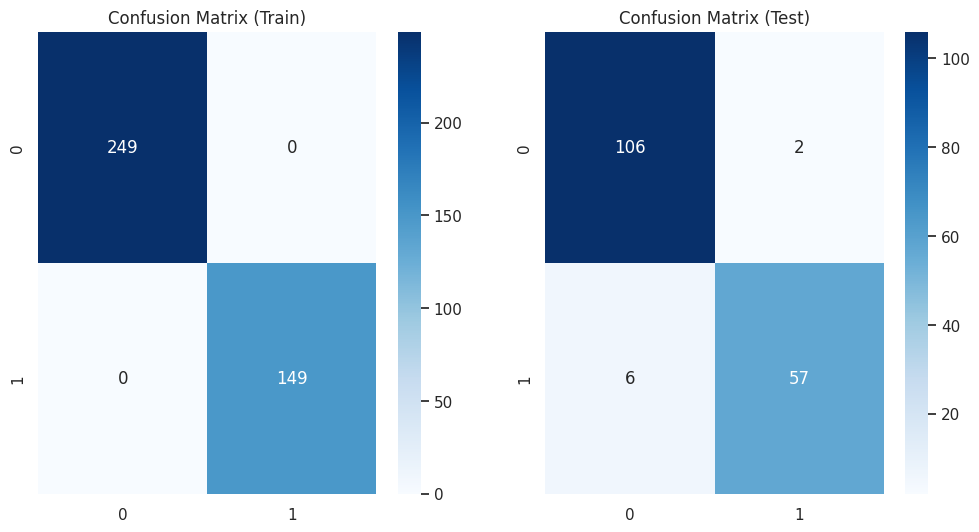

###################### Classification Report(Train) ######################
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       249
           1       1.00      1.00      1.00       149

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398

###################### Classification Report(Test) ######################
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       108
           1       0.97      0.90      0.93        63

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171

###################### Roc Auc Score(Train) ######################
Roc Auc Train:  1.000
###################### Roc Auc Score(Test) ######################
Roc Auc Test:  0.943


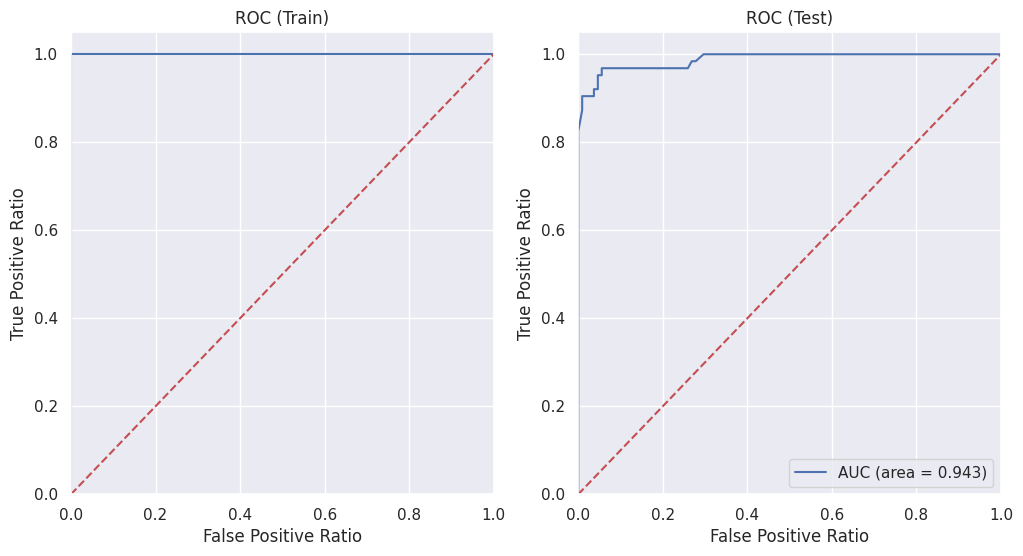

Function execution time: 0 minutes 5 seconds
##################### Accuracy & R2 Metrics ######################
Accuracy_train:  1.000
Accuracy_test:  0.953
R2:  0.986
R2_train:  1.000
R2_test:  0.953
Cross Validation Score(Train):  0.957
Cross Validation Score(Test):  0.924
##################### Confusion Matrix(Train) ######################
[[249   0]
 [  0 149]]
##################### Confusion Matrix(Test) ######################
[[106   2]
 [  6  57]]


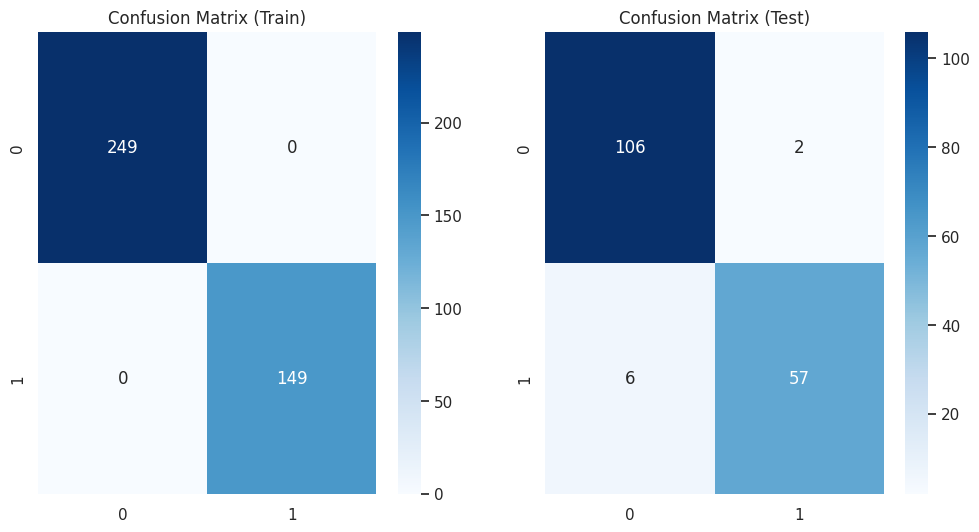

###################### Classification Report(Train) ######################
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       249
           1       1.00      1.00      1.00       149

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398

###################### Classification Report(Test) ######################
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       108
           1       0.97      0.90      0.93        63

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171

###################### Roc Auc Score(Train) ######################
Roc Auc Train:  1.000
###################### Roc Auc Score(Test) ######################
Roc Auc Test:  0.943


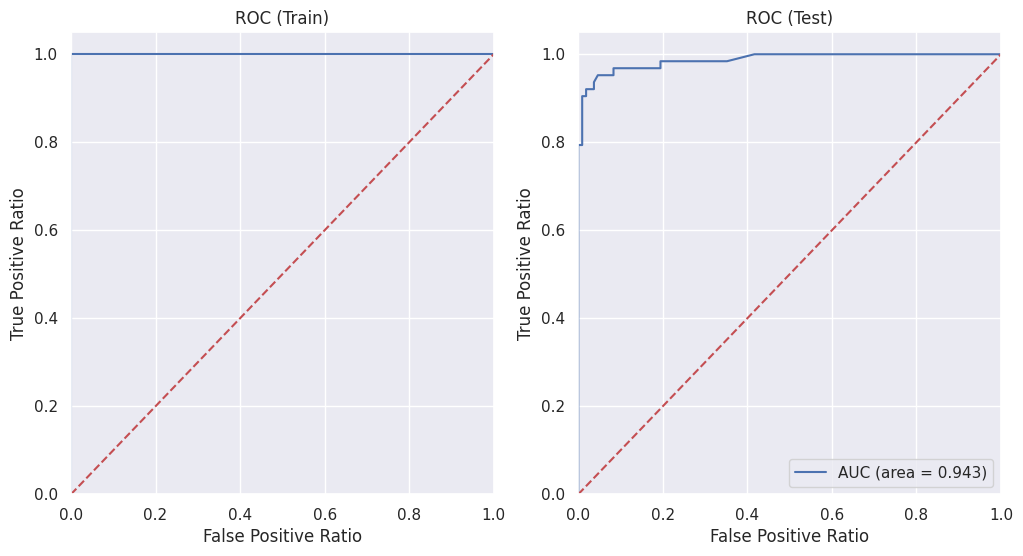

Function execution time: 0 minutes 6 seconds
##################### Accuracy & R2 Metrics ######################
Accuracy_train:  1.000
Accuracy_test:  0.947
R2:  0.984
R2_train:  1.000
R2_test:  0.947
Cross Validation Score(Train):  0.967
Cross Validation Score(Test):  0.930
##################### Confusion Matrix(Train) ######################
[[249   0]
 [  0 149]]
##################### Confusion Matrix(Test) ######################
[[105   3]
 [  6  57]]


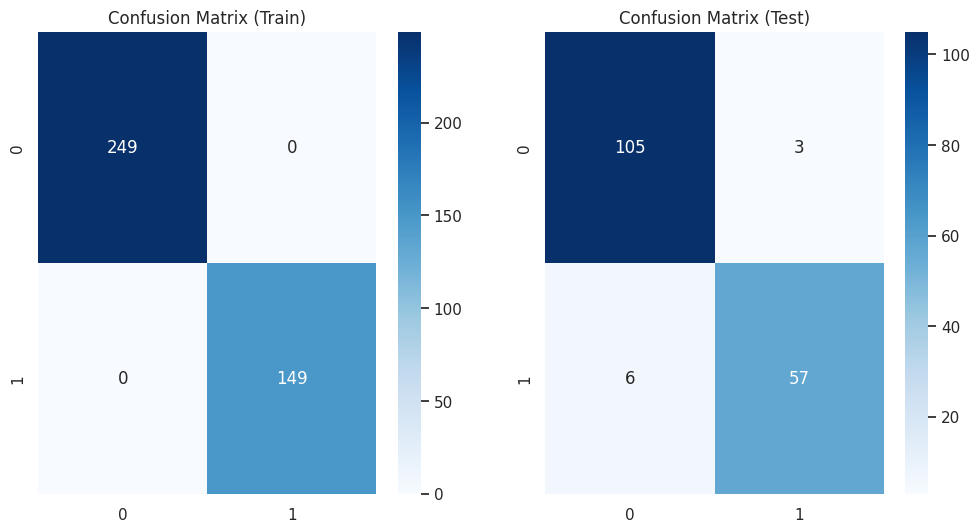

###################### Classification Report(Train) ######################
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       249
           1       1.00      1.00      1.00       149

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398

###################### Classification Report(Test) ######################
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       108
           1       0.95      0.90      0.93        63

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171

###################### Roc Auc Score(Train) ######################
Roc Auc Train:  1.000
###################### Roc Auc Score(Test) ######################
Roc Auc Test:  0.938


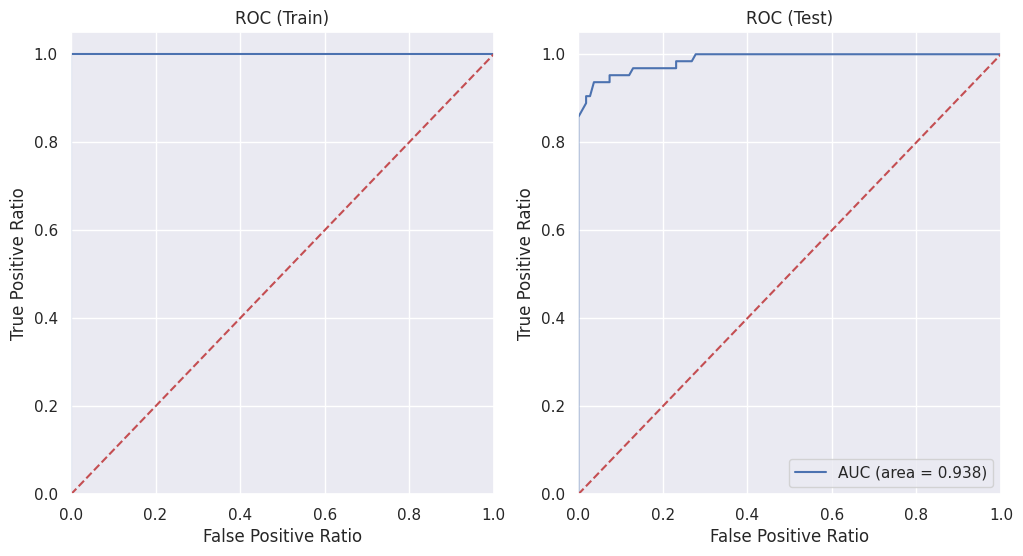

Function execution time: 0 minutes 5 seconds


RandomForestClassifier()

In [ ]:
RF_Model_With_SFFS(top_features, k_features, df, drop_labels=["id", "diagnosis"], target=["diagnosis"])

## Sequential Floating Backward Feature Selection

################################################## Results for f_classif ##################################################
[[['radius_mean', 'concavity_worst', 'radius_se', 'smoothness_worst', 'texture_mean', 'concave points_se', 'smoothness_mean', 'symmetry_mean', 'fractal_dimension_worst', 'compactness_se']]]
################################################## Results for chi2 ##################################################
[[['radius_mean', 'concavity_worst', 'radius_se', 'smoothness_worst', 'texture_mean', 'concave points_se', 'smoothness_mean', 'symmetry_mean', 'fractal_dimension_worst', 'compactness_se']], [['concavity_worst', 'radius_mean', 'radius_se', 'texture_mean', 'concave points_se', 'smoothness_worst', 'compactness_se', 'symmetry_mean', 'smoothness_mean', 'concavity_se']]]
################################################## Results for mutual_info_classif ##################################################
[[['radius_mean', 'concavity_worst', 'radius_se', 'smoothness_wor

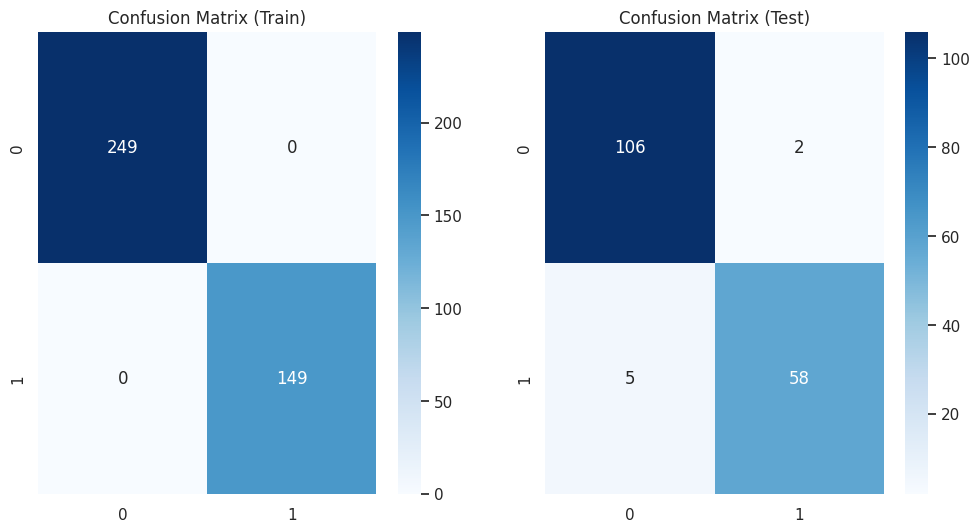

###################### Classification Report(Train) ######################
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       249
           1       1.00      1.00      1.00       149

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398

###################### Classification Report(Test) ######################
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       108
           1       0.97      0.92      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

###################### Roc Auc Score(Train) ######################
Roc Auc Train:  1.000
###################### Roc Auc Score(Test) ######################
Roc Auc Test:  0.951


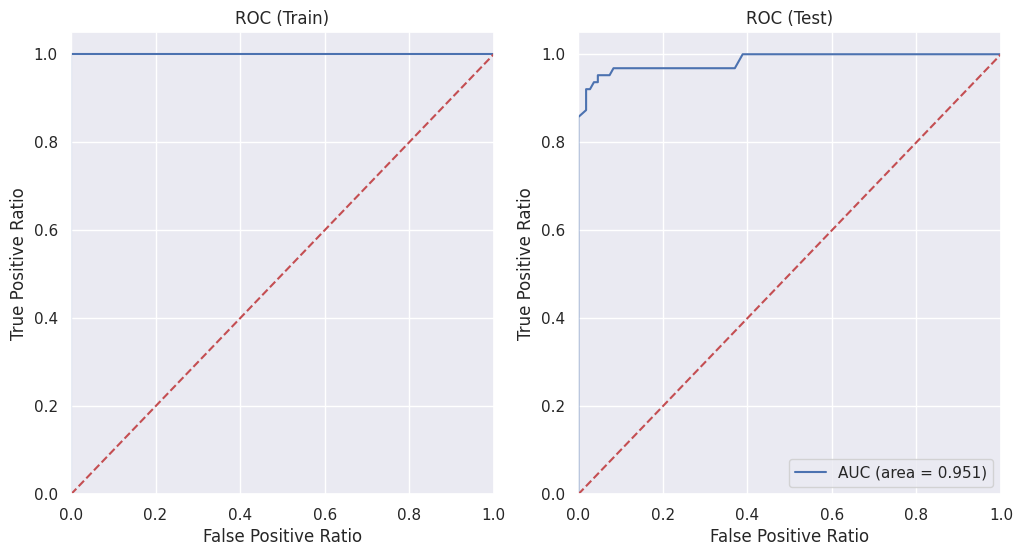

Function execution time: 0 minutes 5 seconds
##################### Accuracy & R2 Metrics ######################
Accuracy_train:  1.000
Accuracy_test:  0.953
R2:  0.986
R2_train:  1.000
R2_test:  0.953
Cross Validation Score(Train):  0.962
Cross Validation Score(Test):  0.924
##################### Confusion Matrix(Train) ######################
[[249   0]
 [  0 149]]
##################### Confusion Matrix(Test) ######################
[[105   3]
 [  5  58]]


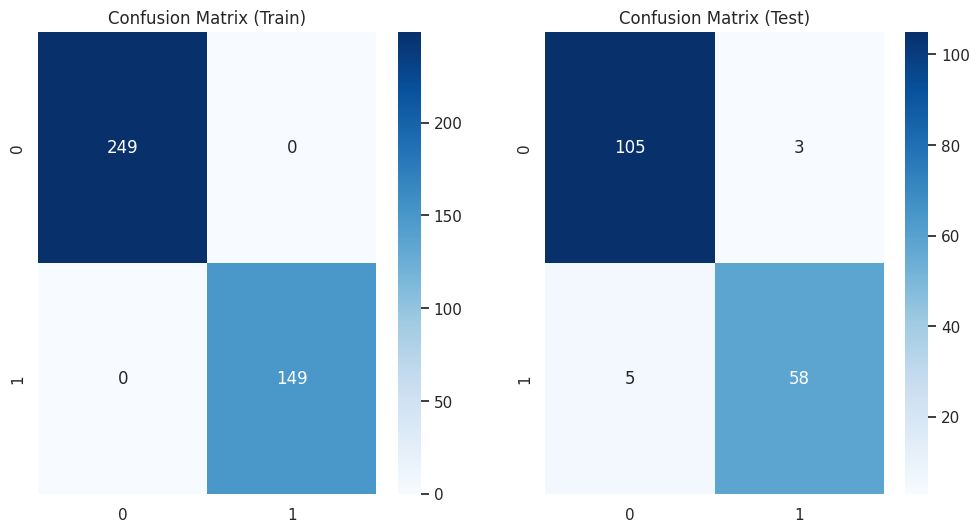

###################### Classification Report(Train) ######################
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       249
           1       1.00      1.00      1.00       149

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398

###################### Classification Report(Test) ######################
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       108
           1       0.95      0.92      0.94        63

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171

###################### Roc Auc Score(Train) ######################
Roc Auc Train:  1.000
###################### Roc Auc Score(Test) ######################
Roc Auc Test:  0.946


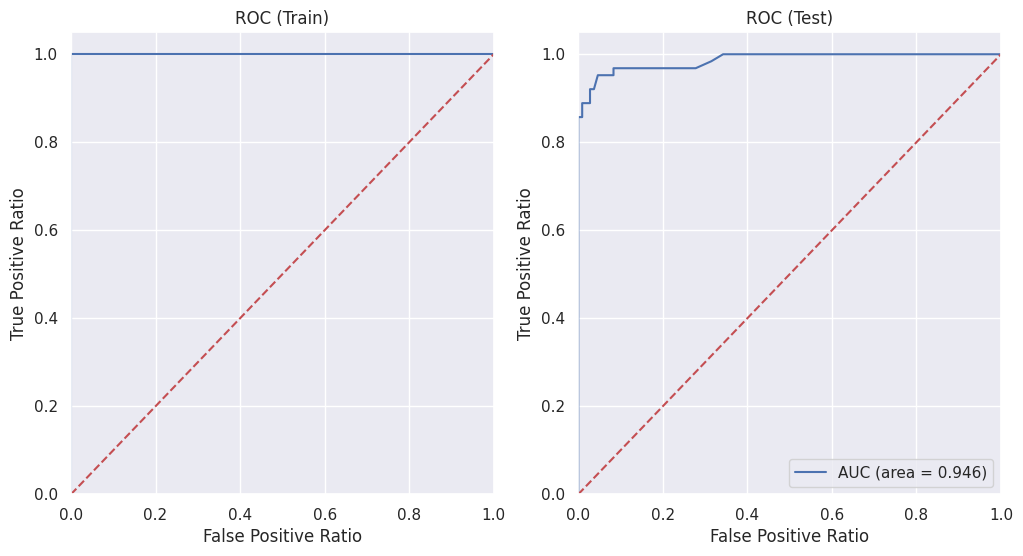

Function execution time: 0 minutes 6 seconds
##################### Accuracy & R2 Metrics ######################
Accuracy_train:  1.000
Accuracy_test:  0.959
R2:  0.988
R2_train:  1.000
R2_test:  0.959
Cross Validation Score(Train):  0.965
Cross Validation Score(Test):  0.924
##################### Confusion Matrix(Train) ######################
[[249   0]
 [  0 149]]
##################### Confusion Matrix(Test) ######################
[[105   3]
 [  4  59]]


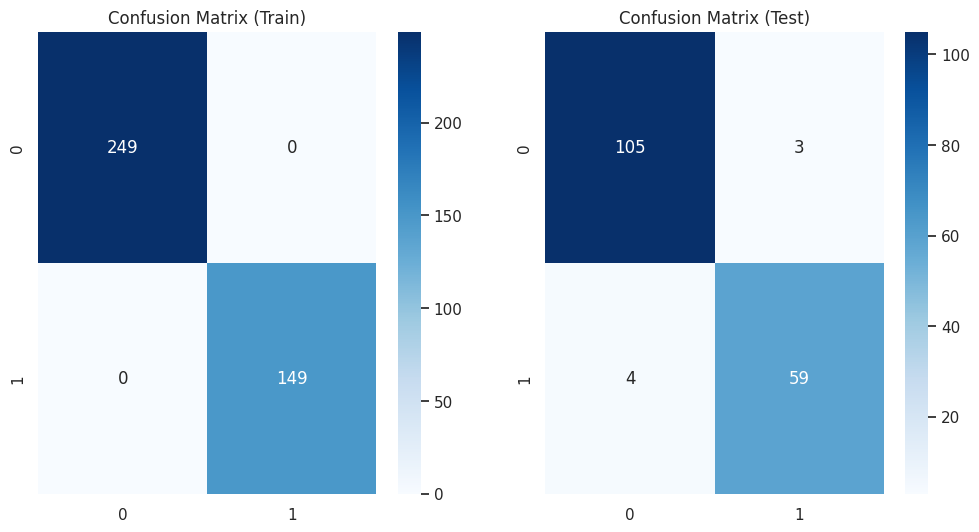

###################### Classification Report(Train) ######################
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       249
           1       1.00      1.00      1.00       149

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398

###################### Classification Report(Test) ######################
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       108
           1       0.95      0.94      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

###################### Roc Auc Score(Train) ######################
Roc Auc Train:  1.000
###################### Roc Auc Score(Test) ######################
Roc Auc Test:  0.954


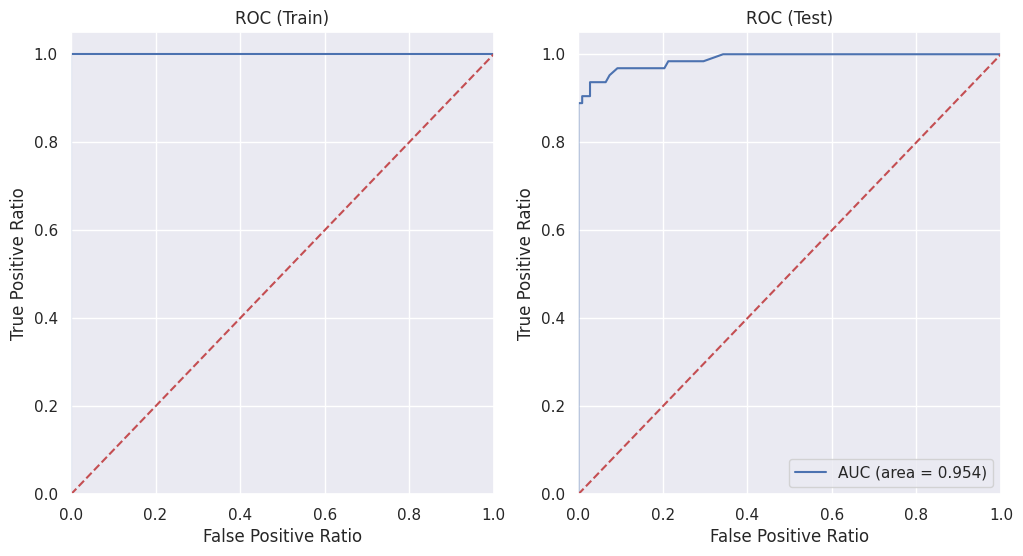

Function execution time: 0 minutes 5 seconds


RandomForestClassifier()

In [ ]:
RF_Model_With_SFFS(top_features, k_features, df, drop_labels=["id", "diagnosis"], target=["diagnosis"], forward=False)

# Exhaustive Feature Selction

Exhaustive feature selection is a feature selection technique that evaluates all possible feature combinations directly to determine the best feature subset. This method generates subsets of all features in the dataset and evaluates the performance of each subset, thereby selecting the most suitable feature set.

In [ ]:
def ExhaustiveFeatureSelectionWrapper(X, y, test_size=0.30, scoring="roc_auc", forward=True, min_features=1, max_features=4):
    # Fill missing data
    df_without_nan = X.apply(lambda x: x.fillna(x.value_counts().index[0]))

    # Split Dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1)
    selected_features_all = []

    # Feature selection
    feature_names = df_without_nan.columns.tolist()
    model_wrapper = ExhaustiveFeatureSelector(RandomForestClassifier(), scoring=scoring, min_features=min_features, max_features=max_features)
    mymodel = model_wrapper.fit(X_train, y_train.values.ravel())
    selected_features_idx = list(mymodel.best_idx_)
    selected_features_names = [feature_names[idx] for idx in selected_features_idx]
    selected_features_all.append(selected_features_names)

    return selected_features_all

In [ ]:
def RF_Model_With_EFS(top_features, k_features, dataframe, drop_labels, target):
    # Load Dataset
    X = dataframe.drop(labels=drop_labels, axis=1)
    y = dataframe[target]

    selected_features = []
    for method, features in top_features.items():
        print(50*"#", f"Results for {method}", 50*"#")
        X_selected = top_features[method][0:k_features]
        X_selected = X.loc[:, X_selected]
        X_selected = ExhaustiveFeatureSelectionWrapper(X_selected, y)
        selected_features.append(X_selected)
        print(selected_features)

    selected_features = [i[0] for i in selected_features]
    for i in selected_features:
        X_selected = X.loc[:, i]
        rf_model = RF_Model(X_selected, y, results=True, conf_matrix=True, c_report=True, roc=True)

    return rf_model

################################################## Results for f_classif ##################################################


Features: 1940/1940

[[['radius_mean', 'radius_se', 'smoothness_worst', 'texture_mean']]]
################################################## Results for chi2 ##################################################


Features: 1940/1940

[[['radius_mean', 'radius_se', 'smoothness_worst', 'texture_mean']], [['radius_mean', 'radius_se', 'texture_mean', 'smoothness_worst']]]
################################################## Results for mutual_info_classif ##################################################


Features: 1940/1940

[[['radius_mean', 'radius_se', 'smoothness_worst', 'texture_mean']], [['radius_mean', 'radius_se', 'texture_mean', 'smoothness_worst']], [['radius_mean', 'radius_se', 'smoothness_worst', 'texture_mean']]]
##################### Accuracy & R2 Metrics ######################
Accuracy_train:  1.000
Accuracy_test:  0.924
R2:  0.977
R2_train:  1.000
R2_test:  0.924
Cross Validation Score(Train):  0.957
Cross Validation Score(Test):  0.912
##################### Confusion Matrix(Train) ######################
[[249   0]
 [  0 149]]
##################### Confusion Matrix(Test) ######################
[[105   3]
 [ 10  53]]


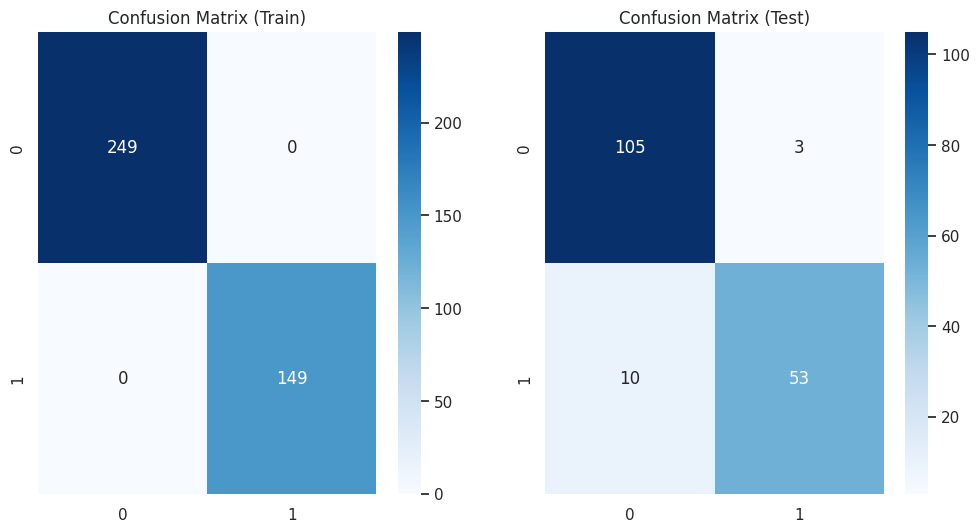

###################### Classification Report(Train) ######################
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       249
           1       1.00      1.00      1.00       149

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398

###################### Classification Report(Test) ######################
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       108
           1       0.95      0.84      0.89        63

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171

###################### Roc Auc Score(Train) ######################
Roc Auc Train:  1.000
###################### Roc Auc Score(Test) ######################
Roc Auc Test:  0.907


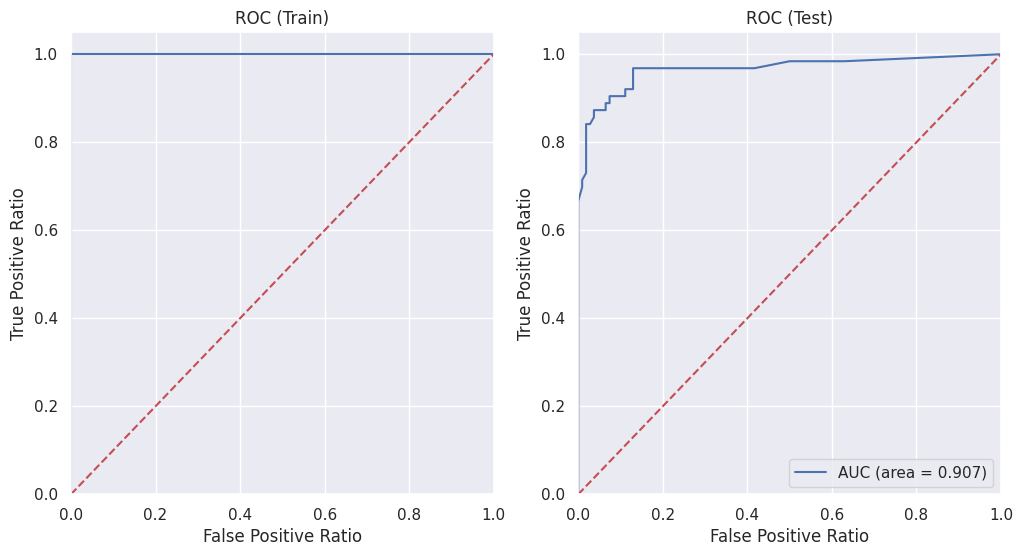

Function execution time: 0 minutes 11 seconds
##################### Accuracy & R2 Metrics ######################
Accuracy_train:  1.000
Accuracy_test:  0.930
R2:  0.979
R2_train:  1.000
R2_test:  0.930
Cross Validation Score(Train):  0.957
Cross Validation Score(Test):  0.918
##################### Confusion Matrix(Train) ######################
[[249   0]
 [  0 149]]
##################### Confusion Matrix(Test) ######################
[[105   3]
 [  9  54]]


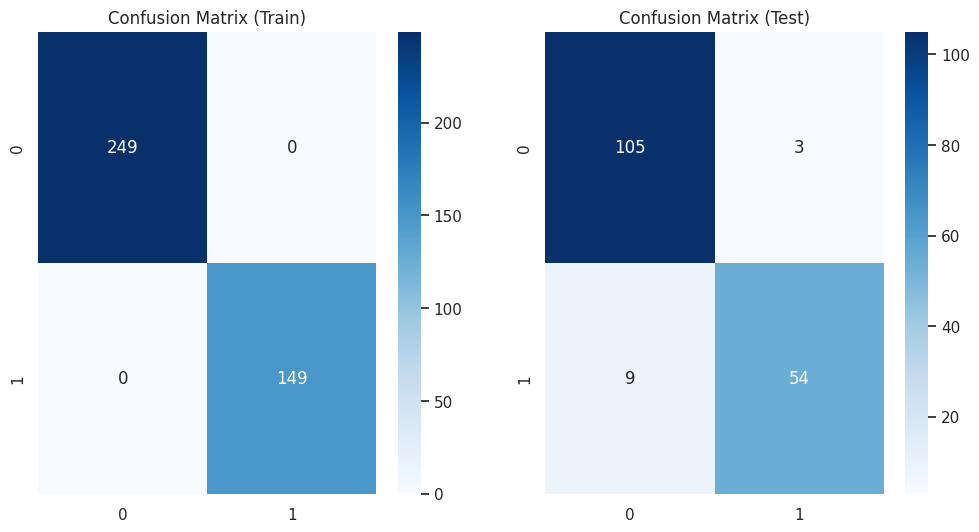

###################### Classification Report(Train) ######################
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       249
           1       1.00      1.00      1.00       149

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398

###################### Classification Report(Test) ######################
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       108
           1       0.95      0.86      0.90        63

    accuracy                           0.93       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.93      0.93       171

###################### Roc Auc Score(Train) ######################
Roc Auc Train:  1.000
###################### Roc Auc Score(Test) ######################
Roc Auc Test:  0.915


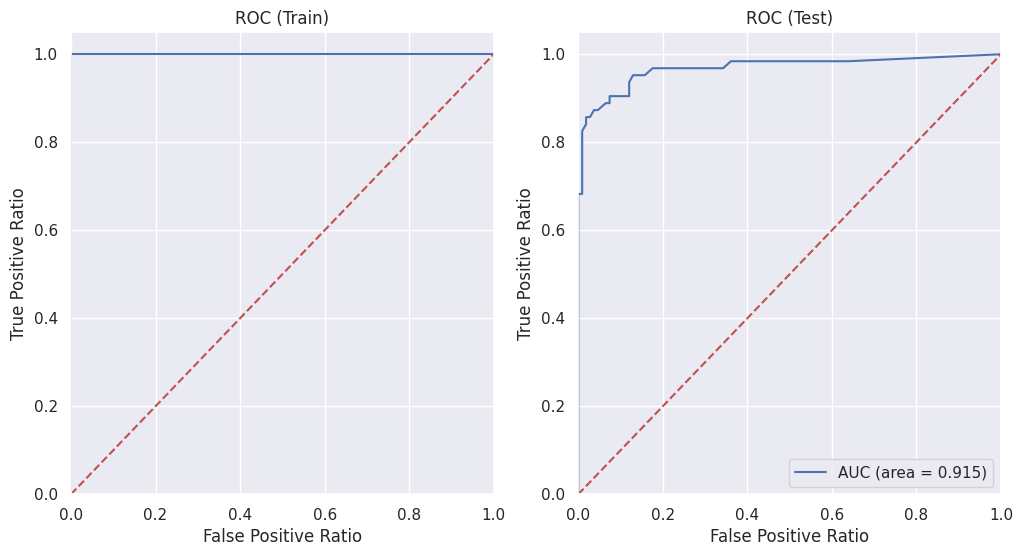

Function execution time: 0 minutes 5 seconds
##################### Accuracy & R2 Metrics ######################
Accuracy_train:  1.000
Accuracy_test:  0.924
R2:  0.977
R2_train:  1.000
R2_test:  0.924
Cross Validation Score(Train):  0.952
Cross Validation Score(Test):  0.929
##################### Confusion Matrix(Train) ######################
[[249   0]
 [  0 149]]
##################### Confusion Matrix(Test) ######################
[[103   5]
 [  8  55]]


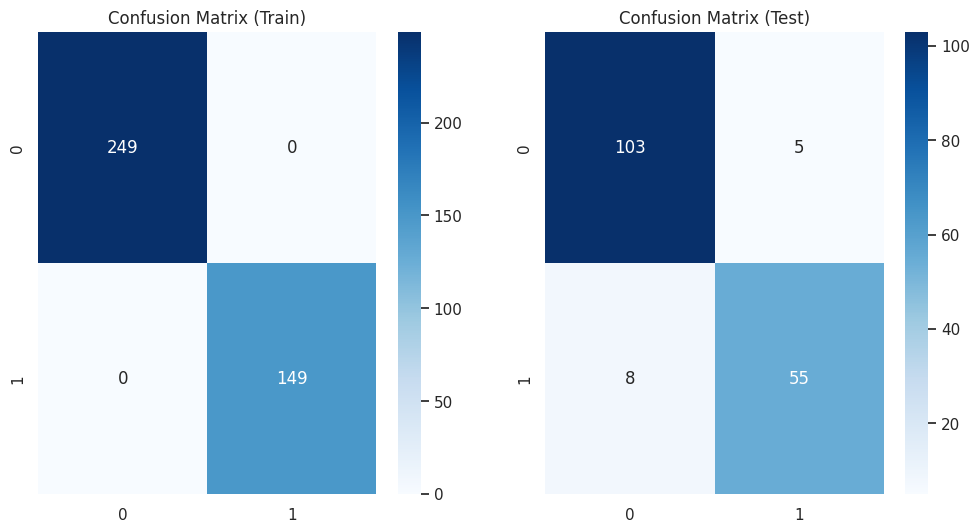

###################### Classification Report(Train) ######################
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       249
           1       1.00      1.00      1.00       149

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398

###################### Classification Report(Test) ######################
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       108
           1       0.92      0.87      0.89        63

    accuracy                           0.92       171
   macro avg       0.92      0.91      0.92       171
weighted avg       0.92      0.92      0.92       171

###################### Roc Auc Score(Train) ######################
Roc Auc Train:  1.000
###################### Roc Auc Score(Test) ######################
Roc Auc Test:  0.913


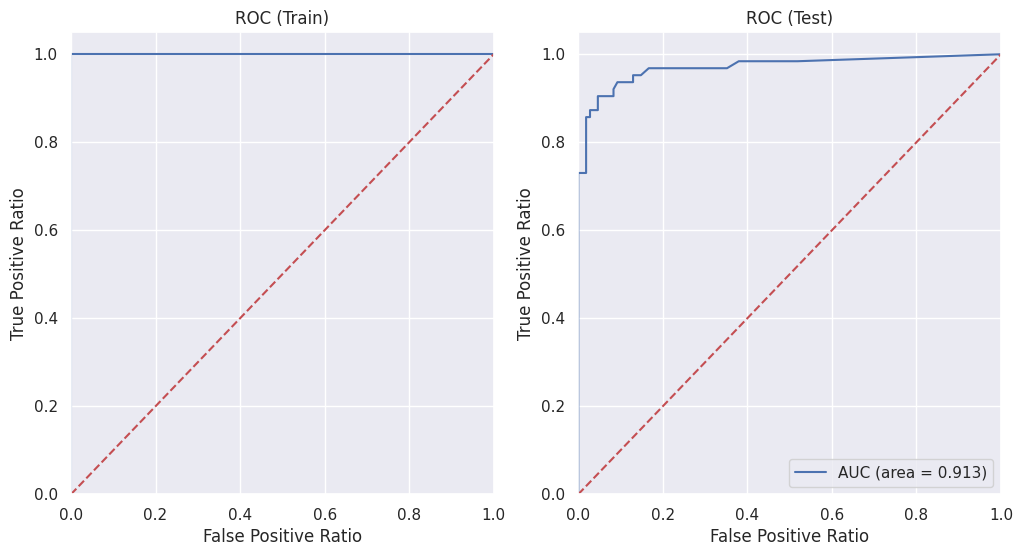

Function execution time: 0 minutes 5 seconds


RandomForestClassifier()

In [ ]:
RF_Model_With_EFS(top_features, k_features, df, drop_labels=["id", "diagnosis"], target="diagnosis")